# 🎬 Netflix Movies & TV Shows - Recommendation System

## Project Overview
This project performs comprehensive Exploratory Data Analysis (EDA) on the Netflix Movies and TV Shows dataset, followed by building a content-based recommendation system.

**Dataset Source:** [Kaggle - Netflix Movies and TV Shows](https://www.kaggle.com/datasets/shivamb/netflix-shows)

### Project Structure:
1. **Data Loading & Initial Exploration**
2. **Feature Types Analysis**
3. **Data Cleaning & Preprocessing**
4. **Feature Engineering**
5. **Exploratory Data Analysis (EDA)**
6. **Hypothesis Testing**
7. **Content-Based Recommendation System**
8. **Conclusions & Insights**

---
**Author:** Data Science Team  
**Date:** December 2025

## 1. Data Loading & Initial Exploration

### 1.1 Import Required Libraries

In [134]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

# For Text Processing & Recommendation System
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
from sklearn.preprocessing import LabelEncoder

# For Statistical Testing
from scipy import stats

# Display settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# ============================================
# PROFESSIONAL VISUALIZATION SETTINGS
# ============================================

# Netflix Brand Color Palette
NETFLIX_RED = '#E50914'
NETFLIX_BLACK = '#141414'
NETFLIX_DARK_GRAY = '#221F1F'
NETFLIX_GRAY = '#B3B3B3'
NETFLIX_WHITE = '#FFFFFF'

# Extended Professional Color Palette
COLORS = {
    'primary': '#E50914',
    'secondary': '#564D4D',
    'accent': '#831010',
    'light': '#F5F5F1',
    'dark': '#141414',
    'gradient': ['#E50914', '#B20710', '#831010', '#564D4D', '#221F1F']
}

# Set matplotlib style for professional look
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    # Figure
    'figure.facecolor': '#FFFFFF',
    'figure.edgecolor': '#FFFFFF',
    'figure.dpi': 100,
    'figure.titlesize': 16,
    'figure.titleweight': 'bold',
    
    # Axes
    'axes.facecolor': '#FAFAFA',
    'axes.edgecolor': '#DDDDDD',
    'axes.labelsize': 11,
    'axes.labelweight': 'medium',
    'axes.titlesize': 13,
    'axes.titleweight': 'bold',
    'axes.titlepad': 15,
    'axes.labelpad': 10,
    'axes.spines.top': False,
    'axes.spines.right': False,
    
    # Grid
    'axes.grid': True,
    'grid.alpha': 0.3,
    'grid.linestyle': '--',
    'grid.color': '#CCCCCC',
    
    # Ticks
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'xtick.color': '#333333',
    'ytick.color': '#333333',
    
    # Legend
    'legend.fontsize': 10,
    'legend.framealpha': 0.9,
    'legend.edgecolor': '#DDDDDD',
    'legend.fancybox': True,
    
    # Font
    'font.family': 'sans-serif',
    'font.size': 10,
    
    # Savefig
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.2
})

# Custom color maps
netflix_cmap = sns.color_palette([NETFLIX_RED, '#B20710', '#831010', '#564D4D', '#221F1F'])
sns.set_palette(netflix_cmap)

print("✅ All libraries imported successfully!")
print("🎨 Professional visualization settings configured!")

✅ All libraries imported successfully!
🎨 Professional visualization settings configured!


### 1.2 Load the Dataset

In [135]:
# Download dataset using kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivamb/netflix-shows")
print("📁 Path to dataset files:", path)

# Load the dataset
import os
csv_file = os.path.join(path, 'netflix_titles.csv')
df = pd.read_csv(csv_file)

print(f"\n✅ Dataset loaded successfully!")
print(f"📊 Shape: {df.shape[0]} rows × {df.shape[1]} columns")

📁 Path to dataset files: /Users/nusratbegum/.cache/kagglehub/datasets/shivamb/netflix-shows/versions/5

✅ Dataset loaded successfully!
📊 Shape: 8807 rows × 12 columns


### 1.3 First Look at the Data

In [136]:
# Display first few rows
print("📋 First 5 rows of the dataset:")
df.head()

📋 First 5 rows of the dataset:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [137]:
# Basic information about the dataset
print("📊 Dataset Information:")
print("=" * 50)
df.info()

📊 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [138]:
# Statistical summary
print("📈 Statistical Summary:")
df.describe(include='all').T

📈 Statistical Summary:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Dick Johnson Is Dead,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,1767,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---
## 2. Feature Types Analysis

Understanding the nature and type of each feature is crucial for proper analysis and preprocessing.

### Dataset Features:
| Feature | Description | Type |
|---------|-------------|------|
| `show_id` | Unique ID for each show | Identifier (Nominal) |
| `type` | Movie or TV Show | Categorical (Binary) |
| `title` | Title of the content | Text (Nominal) |
| `director` | Director(s) name | Categorical (Nominal) |
| `cast` | Cast members | Text (Nominal) |
| `country` | Country of production | Categorical (Nominal) |
| `date_added` | Date added to Netflix | Temporal (Date) |
| `release_year` | Year of release | Numerical (Discrete) |
| `rating` | Content rating | Categorical (Ordinal) |
| `duration` | Duration (min/seasons) | Text/Numerical |
| `listed_in` | Genre categories | Categorical (Multi-label) |
| `description` | Synopsis | Text (Free-form) |

In [139]:
# Detailed Feature Type Analysis
print("🔍 FEATURE TYPES ANALYSIS")
print("=" * 70)

# Create feature analysis dataframe
feature_analysis = pd.DataFrame({
    'Column': df.columns,
    'Data_Type': df.dtypes.values,
    'Non_Null_Count': df.count().values,
    'Null_Count': df.isnull().sum().values,
    'Null_Percentage': (df.isnull().sum() / len(df) * 100).round(2).values,
    'Unique_Values': df.nunique().values
})

# Categorize feature types
def categorize_feature(col):
    if col == 'show_id':
        return 'Identifier'
    elif col in ['type', 'rating']:
        return 'Categorical'
    elif col in ['director', 'cast', 'country', 'listed_in']:
        return 'Categorical (Multi-value)'
    elif col in ['title', 'description']:
        return 'Text'
    elif col == 'date_added':
        return 'Temporal'
    elif col == 'release_year':
        return 'Numerical (Discrete)'
    elif col == 'duration':
        return 'Mixed (Text/Numerical)'
    else:
        return 'Unknown'

feature_analysis['Feature_Category'] = feature_analysis['Column'].apply(categorize_feature)
feature_analysis

🔍 FEATURE TYPES ANALYSIS


,Column,Data_Type,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values,Feature_Category
0,show_id,object,8807,0,0.00,8807,Identifier
1,type,object,8807,0,0.00,2,Categorical
2,title,object,8807,0,0.00,8807,Text
3,director,object,6173,2634,29.91,4528,Categorical (Multi-value)
4,cast,object,7982,825,9.37,7692,Categorical (Multi-value)
5,country,object,7976,831,9.44,748,Categorical (Multi-value)
6,date_added,object,8797,10,0.11,1767,Temporal
7,release_year,int64,8807,0,0.00,74,Numerical (Discrete)
8,rating,object,8803,4,0.05,17,Categorical
9,duration,object,8804,3,0.03,220,Mixed (Text/Numerical)


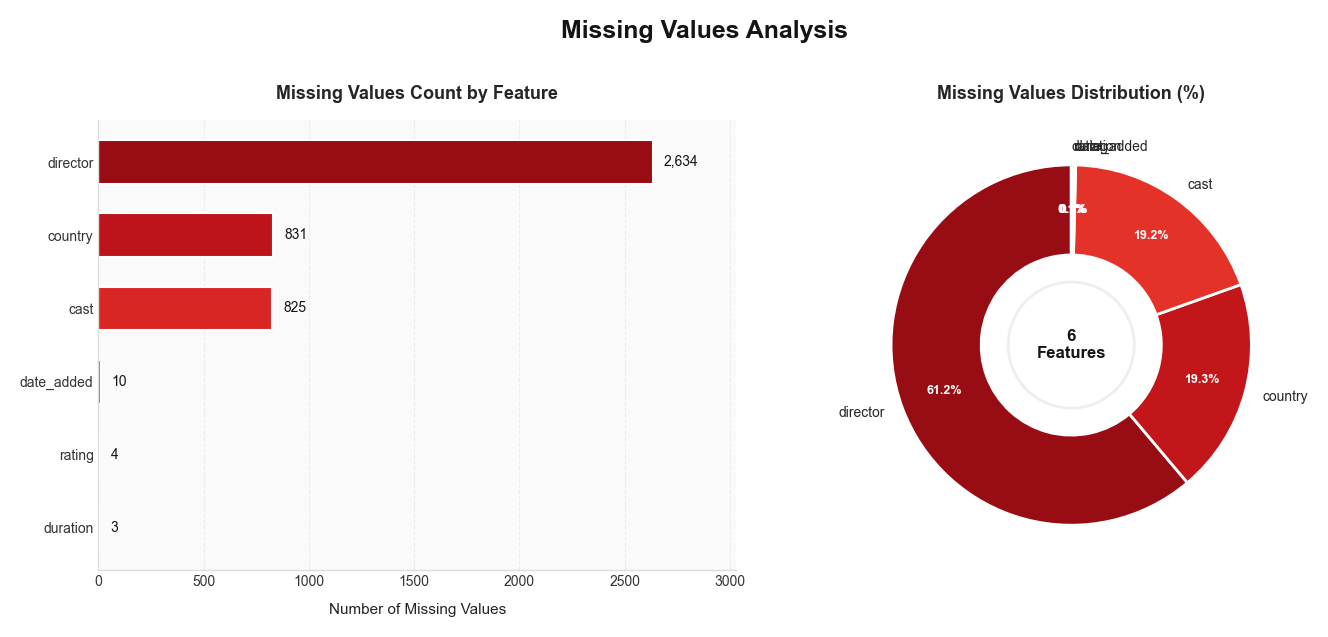


──────────────────────────────────────────────────
📊 MISSING VALUES SUMMARY
──────────────────────────────────────────────────
   Total missing values: 4,307
   Percentage of dataset: 4.08%
   Features affected: 6
──────────────────────────────────────────────────


In [140]:
# Visualize missing values - Professional Design
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Missing Values Analysis', fontsize=18, fontweight='bold', color=NETFLIX_BLACK, y=1.02)

# Missing values bar chart
missing_data = df.isnull().sum().sort_values(ascending=True)
missing_data = missing_data[missing_data > 0]

ax1 = axes[0]
colors_gradient = plt.cm.Reds(np.linspace(0.4, 0.9, len(missing_data)))
bars = ax1.barh(missing_data.index, missing_data.values, color=colors_gradient, 
                edgecolor='white', linewidth=1.5, height=0.6)
ax1.set_xlabel('Number of Missing Values', fontsize=11, fontweight='medium')
ax1.set_title('Missing Values Count by Feature', fontsize=13, fontweight='bold', pad=15)
ax1.set_xlim(0, missing_data.max() * 1.15)

# Add value labels
for bar, val in zip(bars, missing_data.values):
    ax1.text(val + missing_data.max() * 0.02, bar.get_y() + bar.get_height()/2, 
             f'{val:,}', va='center', ha='left', fontsize=10, fontweight='medium', color=NETFLIX_BLACK)

ax1.tick_params(axis='y', labelsize=10)
ax1.grid(axis='x', alpha=0.3, linestyle='--')
ax1.grid(axis='y', visible=False)

# Missing values percentage - Donut chart
ax2 = axes[1]
missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
missing_pct = missing_pct[missing_pct > 0]

colors_pie = plt.cm.Reds(np.linspace(0.9, 0.3, len(missing_pct)))
wedges, texts, autotexts = ax2.pie(missing_pct.values, labels=missing_pct.index, autopct='%1.1f%%', 
                                     colors=colors_pie, startangle=90, pctdistance=0.75,
                                     wedgeprops=dict(width=0.5, edgecolor='white', linewidth=2))

# Style the text
for text in texts:
    text.set_fontsize(10)
    text.set_fontweight('medium')
for autotext in autotexts:
    autotext.set_fontsize(9)
    autotext.set_fontweight('bold')
    autotext.set_color('white')

ax2.set_title('Missing Values Distribution (%)', fontsize=13, fontweight='bold', pad=15)

# Add center text for donut
centre_circle = plt.Circle((0, 0), 0.35, fc='white', ec='#EEEEEE', linewidth=2)
ax2.add_artist(centre_circle)
ax2.text(0, 0, f'{len(missing_pct)}\nFeatures', ha='center', va='center', 
         fontsize=12, fontweight='bold', color=NETFLIX_BLACK)

plt.tight_layout()
plt.show()

# Summary statistics
total_missing = df.isnull().sum().sum()
total_cells = df.size
print(f"\n{'─'*50}")
print(f"📊 MISSING VALUES SUMMARY")
print(f"{'─'*50}")
print(f"   Total missing values: {total_missing:,}")
print(f"   Percentage of dataset: {(total_missing / total_cells * 100):.2f}%")
print(f"   Features affected: {len(missing_pct)}")
print(f"{'─'*50}")

---
## 3. Data Cleaning & Preprocessing

### 3.1 Handle Missing Values

In [141]:
# Create a copy for cleaning
df_clean = df.copy()

# Handle missing values with appropriate strategies
print("🧹 DATA CLEANING PROCESS")
print("=" * 70)

# 1. Director - Fill with 'Unknown'
df_clean['director'] = df_clean['director'].fillna('Unknown')
print("✅ 'director' - Missing values filled with 'Unknown'")

# 2. Cast - Fill with 'Unknown'
df_clean['cast'] = df_clean['cast'].fillna('Unknown')
print("✅ 'cast' - Missing values filled with 'Unknown'")

# 3. Country - Fill with 'Unknown'
df_clean['country'] = df_clean['country'].fillna('Unknown')
print("✅ 'country' - Missing values filled with 'Unknown'")

# 4. Date Added - Fill with mode or drop
df_clean['date_added'] = df_clean['date_added'].fillna(df_clean['date_added'].mode()[0])
print("✅ 'date_added' - Missing values filled with mode")

# 5. Rating - Fill with mode
df_clean['rating'] = df_clean['rating'].fillna(df_clean['rating'].mode()[0])
print("✅ 'rating' - Missing values filled with mode")

# 6. Duration - Check and fill
df_clean['duration'] = df_clean['duration'].fillna('Unknown')
print("✅ 'duration' - Missing values filled with 'Unknown'")

# Verify no missing values
print("\n📊 Missing values after cleaning:")
print(df_clean.isnull().sum())

🧹 DATA CLEANING PROCESS
✅ 'director' - Missing values filled with 'Unknown'
✅ 'cast' - Missing values filled with 'Unknown'
✅ 'country' - Missing values filled with 'Unknown'
✅ 'date_added' - Missing values filled with mode
✅ 'rating' - Missing values filled with mode
✅ 'duration' - Missing values filled with 'Unknown'

📊 Missing values after cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


### 3.2 Data Type Conversions

In [142]:
# Convert date_added to datetime
df_clean['date_added'] = pd.to_datetime(df_clean['date_added'].str.strip())

# Verify conversion
print("📅 Date conversion successful!")
print(f"Date range: {df_clean['date_added'].min()} to {df_clean['date_added'].max()}")
print(f"\nData types after conversion:")
df_clean.dtypes

📅 Date conversion successful!
Date range: 2008-01-01 00:00:00 to 2021-09-25 00:00:00

Data types after conversion:


show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

---
## 4. Feature Engineering

Creating new meaningful features from existing data to enhance analysis and recommendation quality.

In [143]:
print("⚙️ FEATURE ENGINEERING")
print("=" * 70)

# 1. Extract year and month from date_added
df_clean['year_added'] = df_clean['date_added'].dt.year
df_clean['month_added'] = df_clean['date_added'].dt.month
df_clean['day_of_week_added'] = df_clean['date_added'].dt.day_name()
print("✅ Created: year_added, month_added, day_of_week_added")

# 2. Calculate content age (years since release)
current_year = datetime.now().year
df_clean['content_age'] = current_year - df_clean['release_year']
print("✅ Created: content_age (years since release)")

# 3. Time to Netflix (years between release and added to Netflix)
df_clean['time_to_netflix'] = df_clean['year_added'] - df_clean['release_year']
print("✅ Created: time_to_netflix (years from release to Netflix)")

# 4. Extract duration value (numeric)
def extract_duration(duration):
    if pd.isna(duration) or duration == 'Unknown':
        return np.nan
    try:
        return int(duration.split()[0])
    except:
        return np.nan

df_clean['duration_value'] = df_clean['duration'].apply(extract_duration)
print("✅ Created: duration_value (numeric duration)")

# 5. Create duration category for movies
def categorize_duration(row):
    if row['type'] == 'TV Show':
        return 'TV Show'
    duration = row['duration_value']
    if pd.isna(duration):
        return 'Unknown'
    elif duration < 60:
        return 'Short (<60 min)'
    elif duration < 90:
        return 'Medium (60-90 min)'
    elif duration < 120:
        return 'Standard (90-120 min)'
    else:
        return 'Long (>120 min)'

df_clean['duration_category'] = df_clean.apply(categorize_duration, axis=1)
print("✅ Created: duration_category")

# 6. Extract primary country
df_clean['primary_country'] = df_clean['country'].apply(lambda x: x.split(',')[0].strip() if x != 'Unknown' else 'Unknown')
print("✅ Created: primary_country")

# 7. Count of countries
df_clean['country_count'] = df_clean['country'].apply(lambda x: len(x.split(',')) if x != 'Unknown' else 0)
print("✅ Created: country_count")

# 8. Extract primary genre
df_clean['primary_genre'] = df_clean['listed_in'].apply(lambda x: x.split(',')[0].strip())
print("✅ Created: primary_genre")

# 9. Count of genres
df_clean['genre_count'] = df_clean['listed_in'].apply(lambda x: len(x.split(',')))
print("✅ Created: genre_count")

# 10. Cast count
df_clean['cast_count'] = df_clean['cast'].apply(lambda x: len(x.split(',')) if x != 'Unknown' else 0)
print("✅ Created: cast_count")

# 11. Description length (word count)
df_clean['description_length'] = df_clean['description'].apply(lambda x: len(str(x).split()))
print("✅ Created: description_length")

# 12. Is recent content (within last 5 years)
df_clean['is_recent'] = df_clean['release_year'] >= (current_year - 5)
print("✅ Created: is_recent (released within last 5 years)")

print(f"\n📊 New dataset shape: {df_clean.shape}")
print(f"\n🆕 New features created: {df_clean.shape[1] - df.shape[1]}")

⚙️ FEATURE ENGINEERING
✅ Created: year_added, month_added, day_of_week_added
✅ Created: content_age (years since release)
✅ Created: time_to_netflix (years from release to Netflix)
✅ Created: duration_value (numeric duration)
✅ Created: duration_category
✅ Created: primary_country
✅ Created: country_count
✅ Created: primary_genre
✅ Created: genre_count
✅ Created: cast_count
✅ Created: description_length
✅ Created: is_recent (released within last 5 years)

📊 New dataset shape: (8807, 26)

🆕 New features created: 14


In [144]:
# View the engineered features
print("📋 Sample of engineered features:")
df_clean[['title', 'type', 'year_added', 'month_added', 'content_age', 'time_to_netflix', 
          'duration_value', 'duration_category', 'primary_country', 'primary_genre', 
          'genre_count', 'cast_count', 'description_length', 'is_recent']].head(10)

📋 Sample of engineered features:


,title,type,year_added,month_added,content_age,time_to_netflix,duration_value,duration_category,primary_country,primary_genre,genre_count,cast_count,description_length,is_recent
0,Dick Johnson Is Dead,Movie,2021,9,5,1,90.0,Standard (90-120 min),United States,Documentaries,1,0,27,True
1,Blood & Water,TV Show,2021,9,4,0,2.0,TV Show,South Africa,International TV Shows,3,19,27,True
2,Ganglands,TV Show,2021,9,4,0,1.0,TV Show,Unknown,Crime TV Shows,3,9,27,True
3,Jailbirds New Orleans,TV Show,2021,9,4,0,1.0,TV Show,Unknown,Docuseries,2,0,24,True
4,Kota Factory,TV Show,2021,9,4,0,2.0,TV Show,India,International TV Shows,3,8,24,True
5,Midnight Mass,TV Show,2021,9,4,0,1.0,TV Show,Unknown,TV Dramas,3,16,23,True
6,My Little Pony: A New Generation,Movie,2021,9,4,0,91.0,Standard (90-120 min),Unknown,Children & Family Movies,1,10,25,True
7,Sankofa,Movie,2021,9,32,28,125.0,Long (>120 min),United States,Dramas,3,8,28,False
8,The Great British Baking Show,TV Show,2021,9,4,0,9.0,TV Show,United Kingdom,British TV Shows,2,4,26,True
9,The Starling,Movie,2021,9,4,0,104.0,Standard (90-120 min),United States,Comedies,2,11,29,True


---
## 5. Exploratory Data Analysis (EDA)

### 5.1 Content Type Distribution

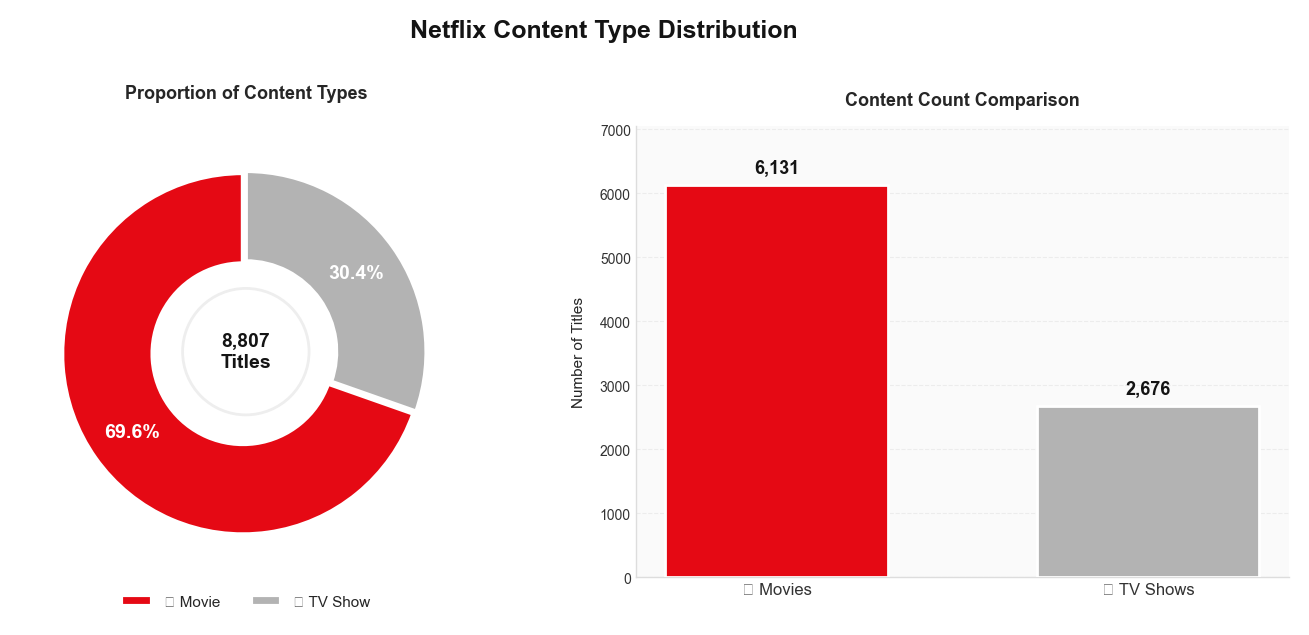


──────────────────────────────────────────────────
📊 CONTENT TYPE SUMMARY
──────────────────────────────────────────────────
   🎬 Movies: 6,131 (69.6%)
   📺 TV Shows: 2,676 (30.4%)
──────────────────────────────────────────────────


In [145]:
# Content Type Analysis - Professional Design
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Netflix Content Type Distribution', fontsize=18, fontweight='bold', color=NETFLIX_BLACK, y=1.02)

type_counts = df_clean['type'].value_counts()

# Donut Chart (more modern than pie)
ax1 = axes[0]
colors = [NETFLIX_RED, NETFLIX_GRAY]
explode = (0.02, 0)
wedges, texts, autotexts = ax1.pie(type_counts.values, labels=None, autopct='%1.1f%%',
                                     colors=colors, explode=explode, startangle=90,
                                     pctdistance=0.75, wedgeprops=dict(width=0.5, edgecolor='white', linewidth=3))

# Style autotexts
for autotext in autotexts:
    autotext.set_fontsize(14)
    autotext.set_fontweight('bold')
    autotext.set_color('white')

# Add center annotation
centre_circle = plt.Circle((0, 0), 0.35, fc='white', ec='#EEEEEE', linewidth=2)
ax1.add_artist(centre_circle)
ax1.text(0, 0, f'{len(df_clean):,}\nTitles', ha='center', va='center', 
         fontsize=14, fontweight='bold', color=NETFLIX_BLACK)

# Custom legend
ax1.legend(wedges, [f'🎬 {type_counts.index[0]}', f'📺 {type_counts.index[1]}'], 
           loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize=11, 
           frameon=False)
ax1.set_title('Proportion of Content Types', fontsize=13, fontweight='bold', pad=20)

# Bar Chart with better styling
ax2 = axes[1]
x_pos = np.arange(len(type_counts))
bars = ax2.bar(x_pos, type_counts.values, color=colors, edgecolor='white', 
               linewidth=2, width=0.6, zorder=3)

ax2.set_xticks(x_pos)
ax2.set_xticklabels(['🎬 Movies', '📺 TV Shows'], fontsize=12, fontweight='medium')
ax2.set_ylabel('Number of Titles', fontsize=11, fontweight='medium')
ax2.set_title('Content Count Comparison', fontsize=13, fontweight='bold', pad=15)
ax2.set_ylim(0, type_counts.max() * 1.15)

# Add value labels on bars
for bar, val in zip(bars, type_counts.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + type_counts.max() * 0.02,
             f'{val:,}', ha='center', va='bottom', fontsize=13, fontweight='bold', color=NETFLIX_BLACK)

ax2.grid(axis='y', alpha=0.3, linestyle='--', zorder=0)
ax2.grid(axis='x', visible=False)

plt.tight_layout()
plt.show()

# Summary
print(f"\n{'─'*50}")
print(f"📊 CONTENT TYPE SUMMARY")
print(f"{'─'*50}")
print(f"   🎬 Movies: {type_counts.get('Movie', 0):,} ({type_counts.get('Movie', 0)/len(df_clean)*100:.1f}%)")
print(f"   📺 TV Shows: {type_counts.get('TV Show', 0):,} ({type_counts.get('TV Show', 0)/len(df_clean)*100:.1f}%)")
print(f"{'─'*50}")

### 5.2 Content Added Over Time

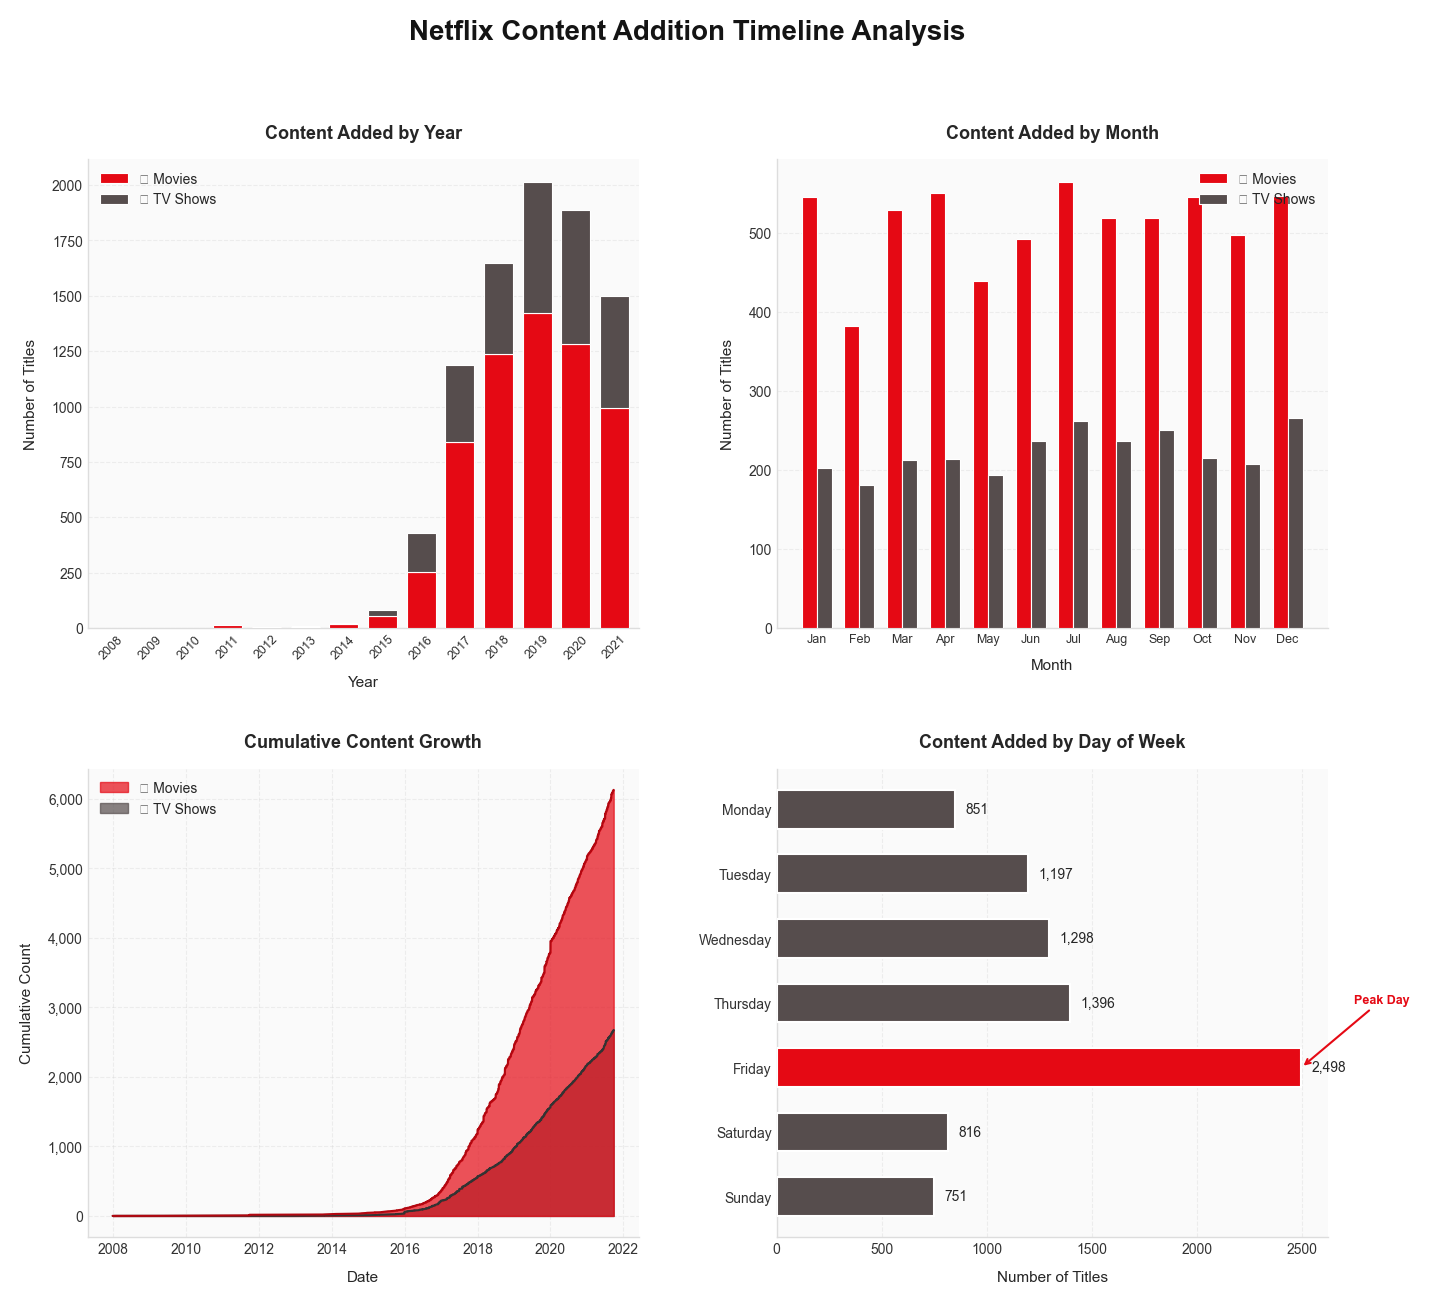

In [146]:
# Content Added Over Time - Professional Design
fig = plt.figure(figsize=(16, 14))
fig.suptitle('Netflix Content Addition Timeline Analysis', fontsize=20, fontweight='bold', 
             color=NETFLIX_BLACK, y=0.98)

# Create grid spec for better layout
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.25)

# 1. Content added by year (stacked bar)
ax1 = fig.add_subplot(gs[0, 0])
yearly_content = df_clean.groupby(['year_added', 'type']).size().unstack(fill_value=0)
yearly_content.plot(kind='bar', stacked=True, ax=ax1, color=[NETFLIX_RED, '#564D4D'], 
                    edgecolor='white', linewidth=0.8, width=0.75, zorder=3)
ax1.set_title('Content Added by Year', fontsize=13, fontweight='bold', pad=15)
ax1.set_xlabel('Year', fontsize=11, fontweight='medium')
ax1.set_ylabel('Number of Titles', fontsize=11, fontweight='medium')
ax1.legend(['🎬 Movies', '📺 TV Shows'], loc='upper left', framealpha=0.9, fontsize=10)
ax1.tick_params(axis='x', rotation=45, labelsize=9)
ax1.grid(axis='y', alpha=0.3, linestyle='--', zorder=0)
ax1.grid(axis='x', visible=False)
ax1.set_axisbelow(True)

# 2. Content added by month
ax2 = fig.add_subplot(gs[0, 1])
monthly_content = df_clean.groupby(['month_added', 'type']).size().unstack(fill_value=0)
x = np.arange(len(monthly_content))
width = 0.35
bars1 = ax2.bar(x - width/2, monthly_content['Movie'], width, label='🎬 Movies', 
                color=NETFLIX_RED, edgecolor='white', linewidth=0.8, zorder=3)
bars2 = ax2.bar(x + width/2, monthly_content['TV Show'], width, label='📺 TV Shows', 
                color='#564D4D', edgecolor='white', linewidth=0.8, zorder=3)
ax2.set_title('Content Added by Month', fontsize=13, fontweight='bold', pad=15)
ax2.set_xlabel('Month', fontsize=11, fontweight='medium')
ax2.set_ylabel('Number of Titles', fontsize=11, fontweight='medium')
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax2.set_xticks(x)
ax2.set_xticklabels(month_labels, fontsize=9)
ax2.legend(loc='upper right', framealpha=0.9, fontsize=10)
ax2.grid(axis='y', alpha=0.3, linestyle='--', zorder=0)
ax2.grid(axis='x', visible=False)

# 3. Cumulative Growth - Area Chart
ax3 = fig.add_subplot(gs[1, 0])
df_clean_sorted = df_clean.sort_values('date_added')
movies_cumsum = (df_clean_sorted['type'] == 'Movie').cumsum()
tv_cumsum = (df_clean_sorted['type'] == 'TV Show').cumsum()

ax3.fill_between(df_clean_sorted['date_added'], movies_cumsum, alpha=0.7, 
                  color=NETFLIX_RED, label='🎬 Movies', zorder=3)
ax3.fill_between(df_clean_sorted['date_added'], tv_cumsum, alpha=0.7, 
                  color='#564D4D', label='📺 TV Shows', zorder=2)
ax3.plot(df_clean_sorted['date_added'], movies_cumsum, color='#B20710', linewidth=1.5, zorder=4)
ax3.plot(df_clean_sorted['date_added'], tv_cumsum, color='#333333', linewidth=1.5, zorder=3)

ax3.set_title('Cumulative Content Growth', fontsize=13, fontweight='bold', pad=15)
ax3.set_xlabel('Date', fontsize=11, fontweight='medium')
ax3.set_ylabel('Cumulative Count', fontsize=11, fontweight='medium')
ax3.legend(loc='upper left', framealpha=0.9, fontsize=10)
ax3.grid(axis='both', alpha=0.3, linestyle='--', zorder=0)

# Format y-axis with comma separator
ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# 4. Day of Week - Horizontal Bar (cleaner)
ax4 = fig.add_subplot(gs[1, 1])
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_content = df_clean['day_of_week_added'].value_counts().reindex(day_order)

colors_days = [NETFLIX_RED if day == 'Friday' else '#564D4D' for day in day_order]
bars = ax4.barh(day_order, day_content.values, color=colors_days, 
                edgecolor='white', linewidth=1.5, height=0.6, zorder=3)
ax4.set_title('Content Added by Day of Week', fontsize=13, fontweight='bold', pad=15)
ax4.set_xlabel('Number of Titles', fontsize=11, fontweight='medium')
ax4.invert_yaxis()

# Add value labels
for bar, val in zip(bars, day_content.values):
    ax4.text(val + day_content.max() * 0.02, bar.get_y() + bar.get_height()/2, 
             f'{val:,}', va='center', ha='left', fontsize=10, fontweight='medium')

ax4.grid(axis='x', alpha=0.3, linestyle='--', zorder=0)
ax4.grid(axis='y', visible=False)

# Highlight Friday
ax4.annotate('Peak Day', xy=(day_content['Friday'], 4), xytext=(day_content['Friday'] * 1.1, 3),
             fontsize=9, fontweight='bold', color=NETFLIX_RED,
             arrowprops=dict(arrowstyle='->', color=NETFLIX_RED, lw=1.5))

plt.tight_layout()
plt.show()

### 5.3 Genre Analysis

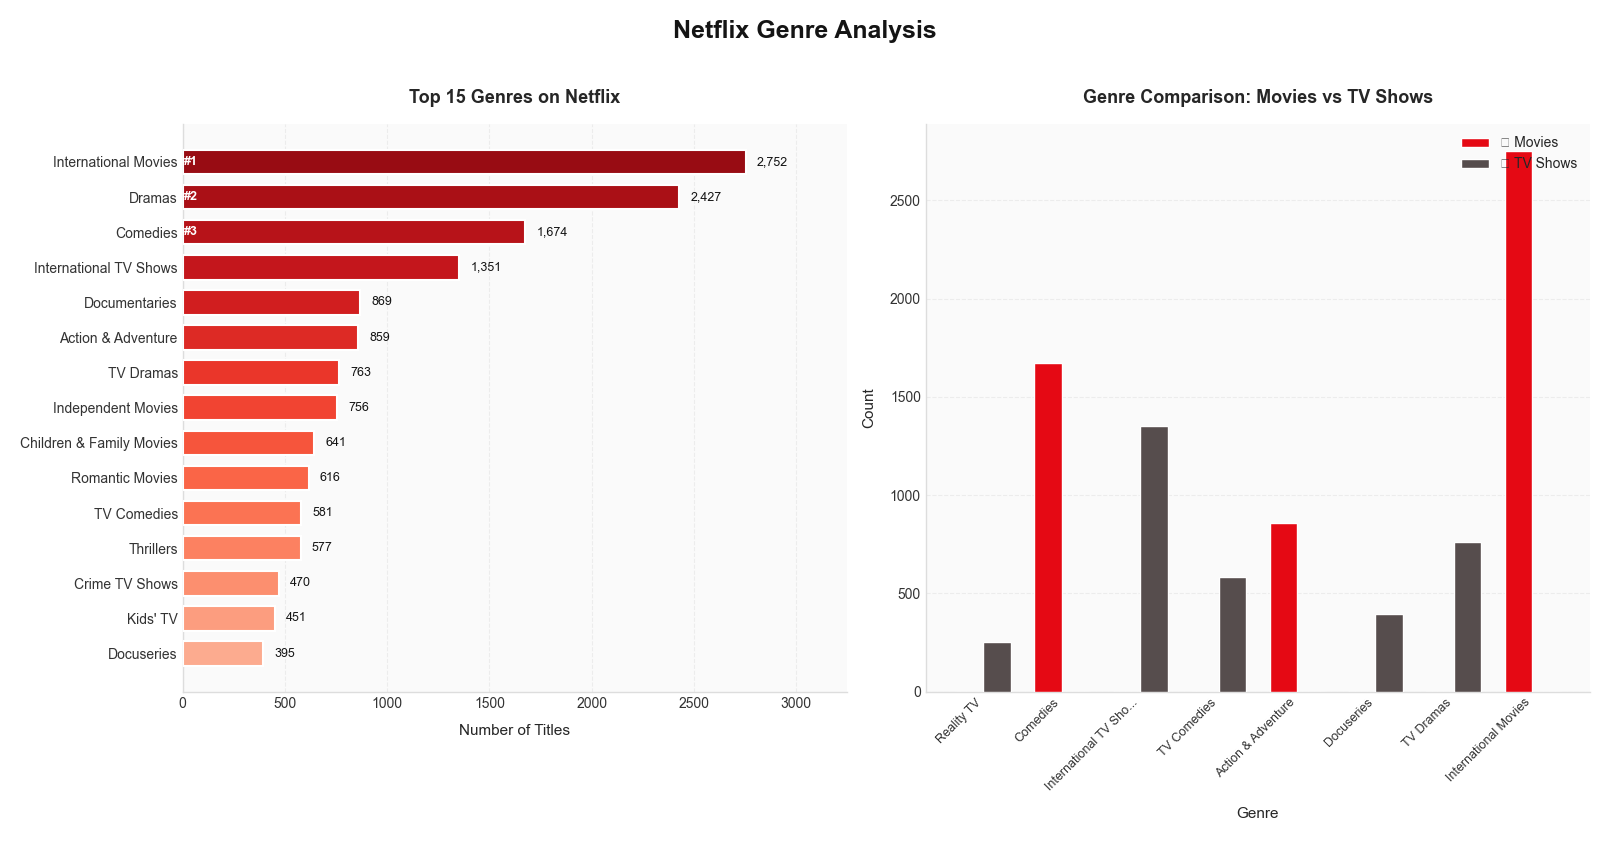


──────────────────────────────────────────────────
📊 GENRE ANALYSIS SUMMARY
──────────────────────────────────────────────────
   Total unique genres: 42
   🥇 Top genre: International Movies (2,752 titles)
   🥈 2nd genre: Dramas (2,427 titles)
   🥉 3rd genre: Comedies (1,674 titles)
──────────────────────────────────────────────────


In [147]:
# Genre Analysis - Professional Design
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Netflix Genre Analysis', fontsize=18, fontweight='bold', color=NETFLIX_BLACK, y=1.02)

# Explode genres for detailed analysis
all_genres = df_clean['listed_in'].str.split(', ').explode()
genre_counts = all_genres.value_counts()

# Top 15 genres - Horizontal Bar
ax1 = axes[0]
top_genres = genre_counts.head(15)
colors_gradient = plt.cm.Reds(np.linspace(0.9, 0.3, len(top_genres)))

bars = ax1.barh(range(len(top_genres)), top_genres.values, color=colors_gradient, 
                edgecolor='white', linewidth=1.5, height=0.7, zorder=3)
ax1.set_yticks(range(len(top_genres)))
ax1.set_yticklabels(top_genres.index, fontsize=10)
ax1.set_xlabel('Number of Titles', fontsize=11, fontweight='medium')
ax1.set_title('Top 15 Genres on Netflix', fontsize=13, fontweight='bold', pad=15)
ax1.invert_yaxis()
ax1.set_xlim(0, top_genres.max() * 1.18)

# Add value labels
for i, (bar, val) in enumerate(zip(bars, top_genres.values)):
    ax1.text(val + top_genres.max() * 0.02, bar.get_y() + bar.get_height()/2, 
             f'{val:,}', va='center', ha='left', fontsize=9, fontweight='medium', color=NETFLIX_BLACK)
    # Highlight top 3
    if i < 3:
        ax1.text(5, bar.get_y() + bar.get_height()/2, f'#{i+1}', 
                 va='center', ha='left', fontsize=9, fontweight='bold', color='white')

ax1.grid(axis='x', alpha=0.3, linestyle='--', zorder=0)
ax1.grid(axis='y', visible=False)

# Genre distribution by content type - Grouped Bar
ax2 = axes[1]
movies_genres = df_clean[df_clean['type'] == 'Movie']['listed_in'].str.split(', ').explode().value_counts().head(10)
tv_genres = df_clean[df_clean['type'] == 'TV Show']['listed_in'].str.split(', ').explode().value_counts().head(10)

# Get common top genres
common_genres = list(set(movies_genres.index[:8]) | set(tv_genres.index[:8]))[:8]
x = np.arange(len(common_genres))
width = 0.35

movie_vals = [movies_genres.get(g, 0) for g in common_genres]
tv_vals = [tv_genres.get(g, 0) for g in common_genres]

bars1 = ax2.bar(x - width/2, movie_vals, width, label='🎬 Movies', 
                color=NETFLIX_RED, edgecolor='white', linewidth=1, zorder=3)
bars2 = ax2.bar(x + width/2, tv_vals, width, label='📺 TV Shows', 
                color='#564D4D', edgecolor='white', linewidth=1, zorder=3)

ax2.set_xlabel('Genre', fontsize=11, fontweight='medium')
ax2.set_ylabel('Count', fontsize=11, fontweight='medium')
ax2.set_title('Genre Comparison: Movies vs TV Shows', fontsize=13, fontweight='bold', pad=15)
ax2.set_xticks(x)

# Truncate long genre names
short_labels = [g[:20] + '...' if len(g) > 20 else g for g in common_genres]
ax2.set_xticklabels(short_labels, rotation=45, ha='right', fontsize=9)
ax2.legend(loc='upper right', framealpha=0.9, fontsize=10)
ax2.grid(axis='y', alpha=0.3, linestyle='--', zorder=0)
ax2.grid(axis='x', visible=False)

plt.tight_layout()
plt.show()

# Summary
print(f"\n{'─'*50}")
print(f"📊 GENRE ANALYSIS SUMMARY")
print(f"{'─'*50}")
print(f"   Total unique genres: {len(genre_counts)}")
print(f"   🥇 Top genre: {genre_counts.index[0]} ({genre_counts.iloc[0]:,} titles)")
print(f"   🥈 2nd genre: {genre_counts.index[1]} ({genre_counts.iloc[1]:,} titles)")
print(f"   🥉 3rd genre: {genre_counts.index[2]} ({genre_counts.iloc[2]:,} titles)")
print(f"{'─'*50}")

### 5.4 Country Analysis

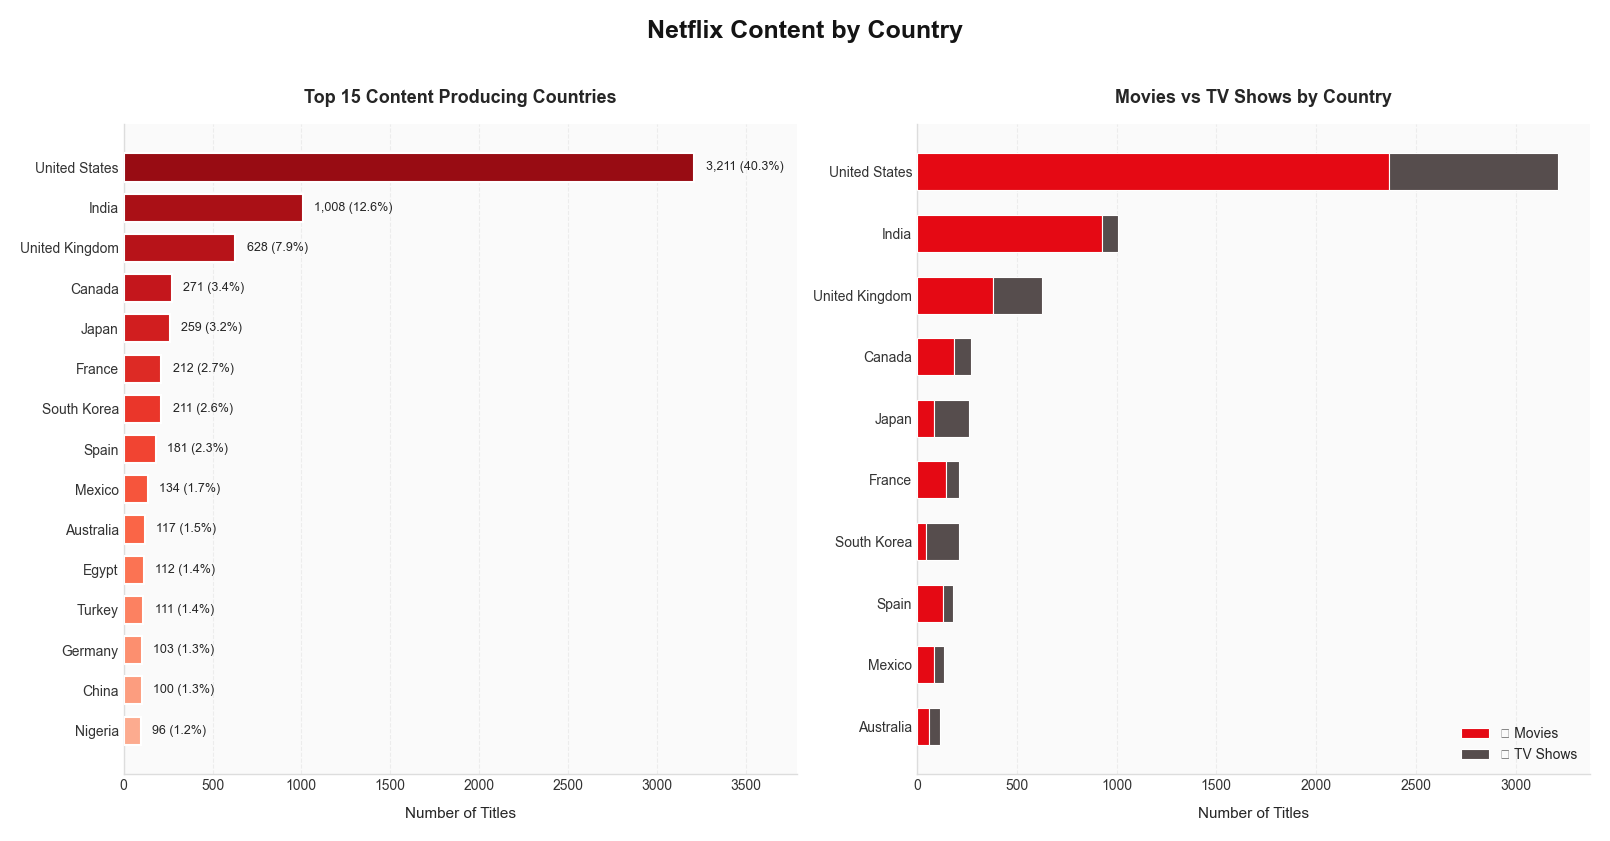


──────────────────────────────────────────────────
🌍 COUNTRY ANALYSIS SUMMARY
──────────────────────────────────────────────────
   🇺🇸 US Content: 3,211 titles (36.5%)
   🌍 Countries represented: 87
   📊 Top 3 countries produce: 4,847 titles
──────────────────────────────────────────────────


In [148]:
# Country Analysis - Professional Design
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Netflix Content by Country', fontsize=18, fontweight='bold', color=NETFLIX_BLACK, y=1.02)

# Top 15 countries - Horizontal Bar
ax1 = axes[0]
country_counts = df_clean['primary_country'].value_counts()
country_counts = country_counts[country_counts.index != 'Unknown'].head(15)

colors_gradient = plt.cm.Reds(np.linspace(0.9, 0.3, len(country_counts)))
bars = ax1.barh(range(len(country_counts)), country_counts.values, color=colors_gradient, 
                edgecolor='white', linewidth=1.5, height=0.7, zorder=3)
ax1.set_yticks(range(len(country_counts)))
ax1.set_yticklabels(country_counts.index, fontsize=10)
ax1.set_xlabel('Number of Titles', fontsize=11, fontweight='medium')
ax1.set_title('Top 15 Content Producing Countries', fontsize=13, fontweight='bold', pad=15)
ax1.invert_yaxis()
ax1.set_xlim(0, country_counts.max() * 1.18)

# Add value labels with percentage
total = len(df_clean[df_clean['primary_country'] != 'Unknown'])
for i, (bar, val) in enumerate(zip(bars, country_counts.values)):
    pct = val / total * 100
    ax1.text(val + country_counts.max() * 0.02, bar.get_y() + bar.get_height()/2, 
             f'{val:,} ({pct:.1f}%)', va='center', ha='left', fontsize=9, fontweight='medium')

ax1.grid(axis='x', alpha=0.3, linestyle='--', zorder=0)
ax1.grid(axis='y', visible=False)

# Content type by top countries - Stacked Bar
ax2 = axes[1]
top_10_countries = country_counts.head(10).index
country_type = df_clean[df_clean['primary_country'].isin(top_10_countries)].groupby(
    ['primary_country', 'type']).size().unstack(fill_value=0)
country_type = country_type.loc[top_10_countries]

# Sort by total content
country_type['total'] = country_type.sum(axis=1)
country_type = country_type.sort_values('total', ascending=True)
country_type = country_type.drop('total', axis=1)

y_pos = range(len(country_type))
bars1 = ax2.barh(y_pos, country_type['Movie'], color=NETFLIX_RED, 
                  edgecolor='white', linewidth=0.8, height=0.6, label='🎬 Movies', zorder=3)
bars2 = ax2.barh(y_pos, country_type['TV Show'], left=country_type['Movie'], color='#564D4D', 
                  edgecolor='white', linewidth=0.8, height=0.6, label='📺 TV Shows', zorder=3)

ax2.set_yticks(y_pos)
ax2.set_yticklabels(country_type.index, fontsize=10)
ax2.set_xlabel('Number of Titles', fontsize=11, fontweight='medium')
ax2.set_title('Movies vs TV Shows by Country', fontsize=13, fontweight='bold', pad=15)
ax2.legend(loc='lower right', framealpha=0.9, fontsize=10)
ax2.grid(axis='x', alpha=0.3, linestyle='--', zorder=0)
ax2.grid(axis='y', visible=False)

plt.tight_layout()
plt.show()

# Summary
us_content = len(df_clean[df_clean['primary_country'] == 'United States'])
print(f"\n{'─'*50}")
print(f"🌍 COUNTRY ANALYSIS SUMMARY")
print(f"{'─'*50}")
print(f"   🇺🇸 US Content: {us_content:,} titles ({us_content/len(df_clean)*100:.1f}%)")
print(f"   🌍 Countries represented: {df_clean['primary_country'].nunique()}")
print(f"   📊 Top 3 countries produce: {country_counts.head(3).sum():,} titles")
print(f"{'─'*50}")

### 5.5 Rating Analysis

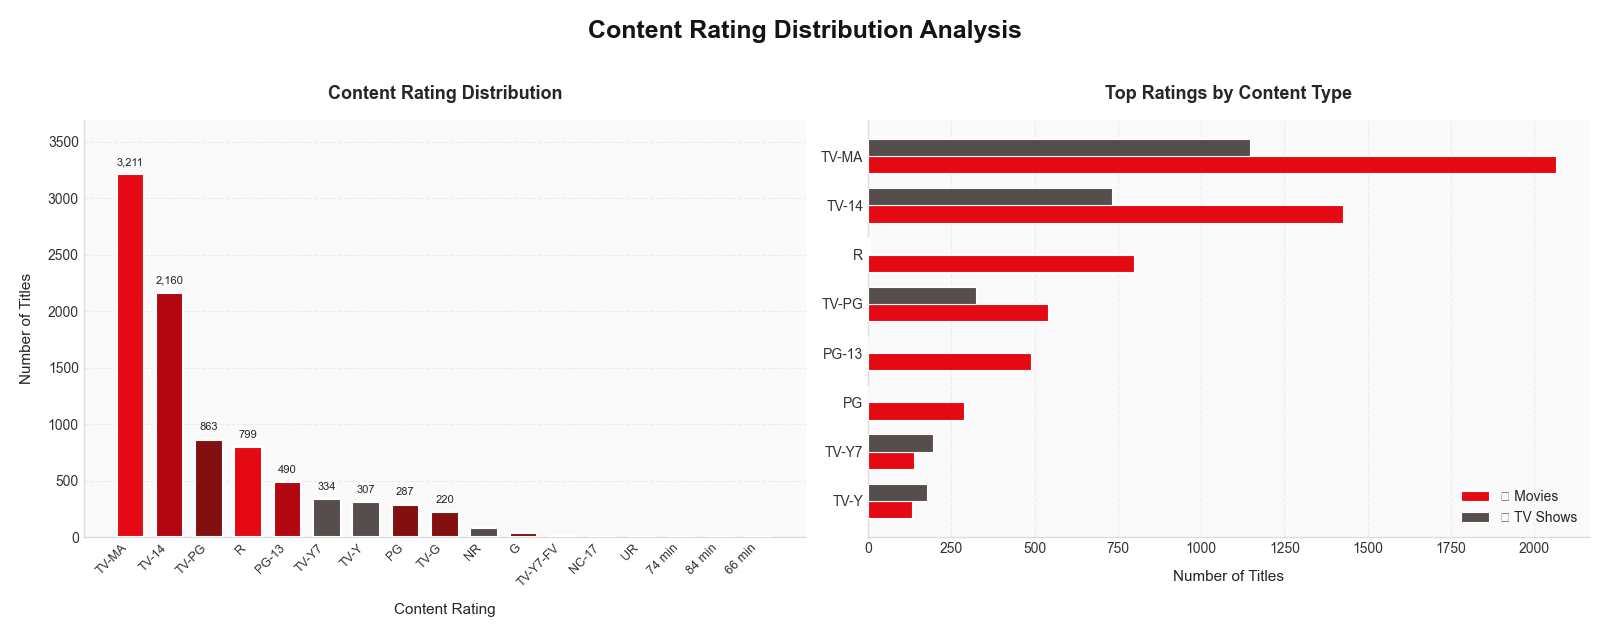


──────────────────────────────────────────────────
📊 RATING ANALYSIS SUMMARY
──────────────────────────────────────────────────
   Most common rating: TV-MA (3,211 titles)
   🔞 Adult content (TV-MA, R): 4,013 titles (45.6%)
   👨‍👩‍👧‍👦 Kids/Family content: 975 titles (11.1%)
──────────────────────────────────────────────────


In [149]:
# Rating Analysis - Professional Design
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Content Rating Distribution Analysis', fontsize=18, fontweight='bold', color=NETFLIX_BLACK, y=1.02)

# Rating distribution - Bar Chart
ax1 = axes[0]
rating_counts = df_clean['rating'].value_counts()

# Create color mapping based on rating category
def get_rating_color(rating):
    adult = ['TV-MA', 'R', 'NC-17']
    teen = ['TV-14', 'PG-13']
    family = ['TV-PG', 'PG', 'TV-G', 'G']
    kids = ['TV-Y', 'TV-Y7', 'TV-Y7-FV']
    
    if rating in adult:
        return NETFLIX_RED
    elif rating in teen:
        return '#B20710'
    elif rating in family:
        return '#831010'
    else:
        return '#564D4D'

colors = [get_rating_color(r) for r in rating_counts.index]
bars = ax1.bar(range(len(rating_counts)), rating_counts.values, color=colors, 
               edgecolor='white', linewidth=1.5, width=0.7, zorder=3)

ax1.set_xticks(range(len(rating_counts)))
ax1.set_xticklabels(rating_counts.index, rotation=45, ha='right', fontsize=9)
ax1.set_xlabel('Content Rating', fontsize=11, fontweight='medium')
ax1.set_ylabel('Number of Titles', fontsize=11, fontweight='medium')
ax1.set_title('Content Rating Distribution', fontsize=13, fontweight='bold', pad=15)
ax1.set_ylim(0, rating_counts.max() * 1.15)

# Add value labels
for bar, val in zip(bars, rating_counts.values):
    if val > rating_counts.max() * 0.05:  # Only show labels for significant bars
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + rating_counts.max() * 0.02,
                 f'{val:,}', ha='center', va='bottom', fontsize=8, fontweight='medium')

ax1.grid(axis='y', alpha=0.3, linestyle='--', zorder=0)
ax1.grid(axis='x', visible=False)

# Rating by content type - Grouped Horizontal Bar
ax2 = axes[1]
rating_type = df_clean.groupby(['rating', 'type']).size().unstack(fill_value=0)

# Get top 8 ratings by total count
top_ratings = rating_type.sum(axis=1).nlargest(8).index
rating_type_top = rating_type.loc[top_ratings].sort_values(by='Movie', ascending=True)

y_pos = range(len(rating_type_top))
height = 0.35

bars1 = ax2.barh([p - height/2 for p in y_pos], rating_type_top['Movie'], height=height, 
                  color=NETFLIX_RED, edgecolor='white', linewidth=0.8, label='🎬 Movies', zorder=3)
bars2 = ax2.barh([p + height/2 for p in y_pos], rating_type_top['TV Show'], height=height, 
                  color='#564D4D', edgecolor='white', linewidth=0.8, label='📺 TV Shows', zorder=3)

ax2.set_yticks(y_pos)
ax2.set_yticklabels(rating_type_top.index, fontsize=10)
ax2.set_xlabel('Number of Titles', fontsize=11, fontweight='medium')
ax2.set_title('Top Ratings by Content Type', fontsize=13, fontweight='bold', pad=15)
ax2.legend(loc='lower right', framealpha=0.9, fontsize=10)
ax2.grid(axis='x', alpha=0.3, linestyle='--', zorder=0)
ax2.grid(axis='y', visible=False)

plt.tight_layout()
plt.show()

# Summary
adult_content = len(df_clean[df_clean['rating'].isin(['TV-MA', 'R', 'NC-17'])])
kids_content = len(df_clean[df_clean['rating'].isin(['TV-Y', 'TV-Y7', 'G', 'PG', 'TV-Y7-FV'])])

print(f"\n{'─'*50}")
print(f"📊 RATING ANALYSIS SUMMARY")
print(f"{'─'*50}")
print(f"   Most common rating: {rating_counts.index[0]} ({rating_counts.iloc[0]:,} titles)")
print(f"   🔞 Adult content (TV-MA, R): {adult_content:,} titles ({adult_content/len(df_clean)*100:.1f}%)")
print(f"   👨‍👩‍👧‍👦 Kids/Family content: {kids_content:,} titles ({kids_content/len(df_clean)*100:.1f}%)")
print(f"{'─'*50}")

### 5.6 Duration Analysis

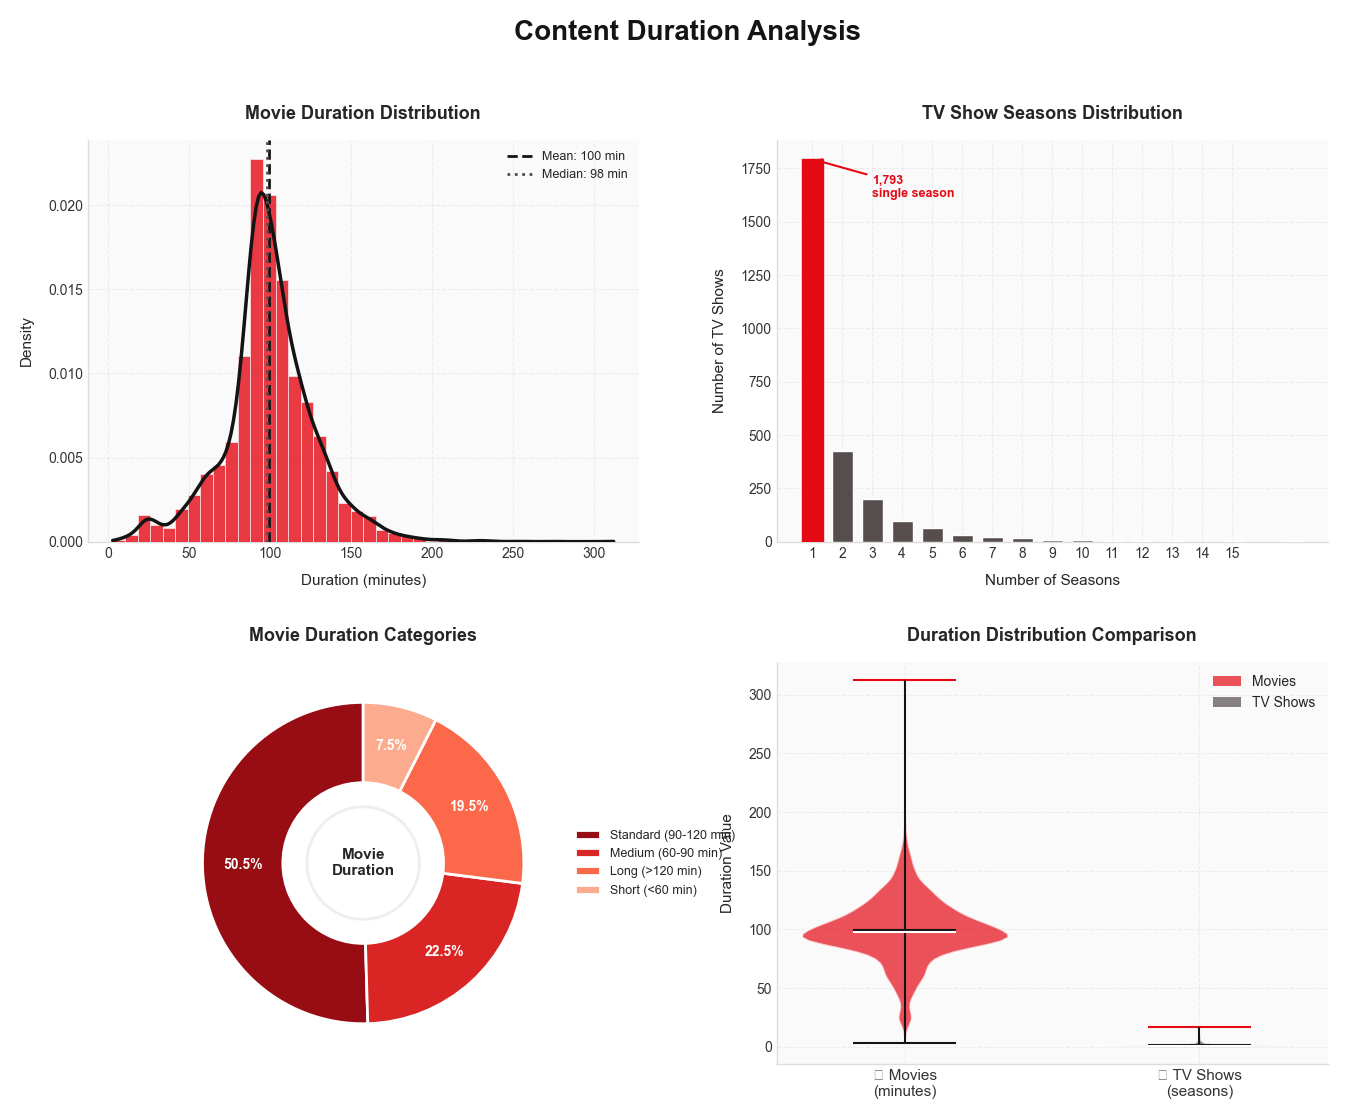


──────────────────────────────────────────────────
⏱️ DURATION ANALYSIS SUMMARY
──────────────────────────────────────────────────
   🎬 Movies: Mean 99.6 min | Median 98 min
   📺 TV Shows: Mean 1.8 seasons | Median 1 season
   📊 Single-season TV shows: 1,793 (67.0%)
──────────────────────────────────────────────────


In [150]:
# Duration Analysis - Professional Design
fig = plt.figure(figsize=(16, 12))
fig.suptitle('Content Duration Analysis', fontsize=20, fontweight='bold', color=NETFLIX_BLACK, y=0.98)

gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.25)

# 1. Movie duration distribution - Histogram with KDE
ax1 = fig.add_subplot(gs[0, 0])
movies = df_clean[df_clean['type'] == 'Movie']
movie_duration = movies['duration_value'].dropna()

ax1.hist(movie_duration, bins=40, color=NETFLIX_RED, edgecolor='white', 
         linewidth=0.5, alpha=0.8, density=True, zorder=3)

# Add KDE
from scipy.stats import gaussian_kde
kde = gaussian_kde(movie_duration)
x_range = np.linspace(movie_duration.min(), movie_duration.max(), 200)
ax1.plot(x_range, kde(x_range), color='#141414', linewidth=2.5, zorder=4)

# Add mean and median lines
mean_val = movie_duration.mean()
median_val = movie_duration.median()
ax1.axvline(mean_val, color='#141414', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.0f} min', zorder=5)
ax1.axvline(median_val, color='#564D4D', linestyle=':', linewidth=2, label=f'Median: {median_val:.0f} min', zorder=5)

ax1.set_xlabel('Duration (minutes)', fontsize=11, fontweight='medium')
ax1.set_ylabel('Density', fontsize=11, fontweight='medium')
ax1.set_title('Movie Duration Distribution', fontsize=13, fontweight='bold', pad=15)
ax1.legend(loc='upper right', framealpha=0.9, fontsize=9)
ax1.grid(axis='y', alpha=0.3, linestyle='--', zorder=0)

# 2. TV Show seasons distribution
ax2 = fig.add_subplot(gs[0, 1])
tv_shows = df_clean[df_clean['type'] == 'TV Show']
tv_duration = tv_shows['duration_value'].dropna()

# Count plot for seasons
season_counts = tv_duration.value_counts().sort_index().head(15)
bars = ax2.bar(season_counts.index.astype(int), season_counts.values, color='#564D4D', 
               edgecolor='white', linewidth=1, width=0.7, zorder=3)

# Highlight single season shows
bars[0].set_color(NETFLIX_RED)

ax2.set_xlabel('Number of Seasons', fontsize=11, fontweight='medium')
ax2.set_ylabel('Number of TV Shows', fontsize=11, fontweight='medium')
ax2.set_title('TV Show Seasons Distribution', fontsize=13, fontweight='bold', pad=15)
ax2.set_xticks(range(1, 16))
ax2.grid(axis='y', alpha=0.3, linestyle='--', zorder=0)

# Add annotation for single season
ax2.annotate(f'{int(season_counts.iloc[0]):,}\nsingle season', 
             xy=(1, season_counts.iloc[0]), xytext=(3, season_counts.iloc[0] * 0.9),
             fontsize=9, fontweight='bold', color=NETFLIX_RED,
             arrowprops=dict(arrowstyle='->', color=NETFLIX_RED, lw=1.5))

# 3. Movie duration categories - Donut Chart
ax3 = fig.add_subplot(gs[1, 0])
duration_cat_counts = movies['duration_category'].value_counts()
duration_cat_counts = duration_cat_counts[duration_cat_counts.index != 'Unknown']

colors_cat = plt.cm.Reds(np.linspace(0.3, 0.9, len(duration_cat_counts)))[::-1]
wedges, texts, autotexts = ax3.pie(duration_cat_counts.values, labels=None, autopct='%1.1f%%',
                                    colors=colors_cat, startangle=90, pctdistance=0.75,
                                    wedgeprops=dict(width=0.5, edgecolor='white', linewidth=2))

for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')
    autotext.set_color('white')

centre_circle = plt.Circle((0, 0), 0.35, fc='white', ec='#EEEEEE', linewidth=2)
ax3.add_artist(centre_circle)
ax3.text(0, 0, 'Movie\nDuration', ha='center', va='center', fontsize=11, fontweight='bold')
ax3.legend(wedges, duration_cat_counts.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9)
ax3.set_title('Movie Duration Categories', fontsize=13, fontweight='bold', pad=15)

# 4. Box plot comparison with violin
ax4 = fig.add_subplot(gs[1, 1])

# Create violin plot with showextrema=True to include cmins and cmaxs
parts = ax4.violinplot([movie_duration, tv_duration], positions=[1, 2], 
                        showmeans=True, showmedians=True, showextrema=True, widths=0.7)

# Color the violins
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(NETFLIX_RED if i == 0 else '#564D4D')
    pc.set_edgecolor('white')
    pc.set_alpha(0.7)
    pc.set_linewidth(1.5)

# Style other elements - check if keys exist before styling
if 'cmeans' in parts:
    parts['cmeans'].set_color('#141414')
if 'cmedians' in parts:
    parts['cmedians'].set_color('white')
if 'cbars' in parts:
    parts['cbars'].set_color('#141414')
if 'cmins' in parts:
    parts['cmins'].set_color('#141414')
if 'cmaxs' in parts:
    parts['cmaxs'].set_color('#141414')

ax4.set_xticks([1, 2])
ax4.set_xticklabels(['🎬 Movies\n(minutes)', '📺 TV Shows\n(seasons)'], fontsize=11)
ax4.set_ylabel('Duration Value', fontsize=11, fontweight='medium')
ax4.set_title('Duration Distribution Comparison', fontsize=13, fontweight='bold', pad=15)
ax4.grid(axis='y', alpha=0.3, linestyle='--', zorder=0)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=NETFLIX_RED, alpha=0.7, label='Movies'),
                   Patch(facecolor='#564D4D', alpha=0.7, label='TV Shows')]
ax4.legend(handles=legend_elements, loc='upper right', framealpha=0.9)

plt.tight_layout()
plt.show()

# Summary
print(f"\n{'─'*50}")
print(f"⏱️ DURATION ANALYSIS SUMMARY")
print(f"{'─'*50}")
print(f"   🎬 Movies: Mean {movie_duration.mean():.1f} min | Median {movie_duration.median():.0f} min")
print(f"   📺 TV Shows: Mean {tv_duration.mean():.1f} seasons | Median {tv_duration.median():.0f} season")
print(f"   📊 Single-season TV shows: {int(season_counts.iloc[0]):,} ({season_counts.iloc[0]/len(tv_shows)*100:.1f}%)")
print(f"{'─'*50}")

### 5.7 Release Year Analysis

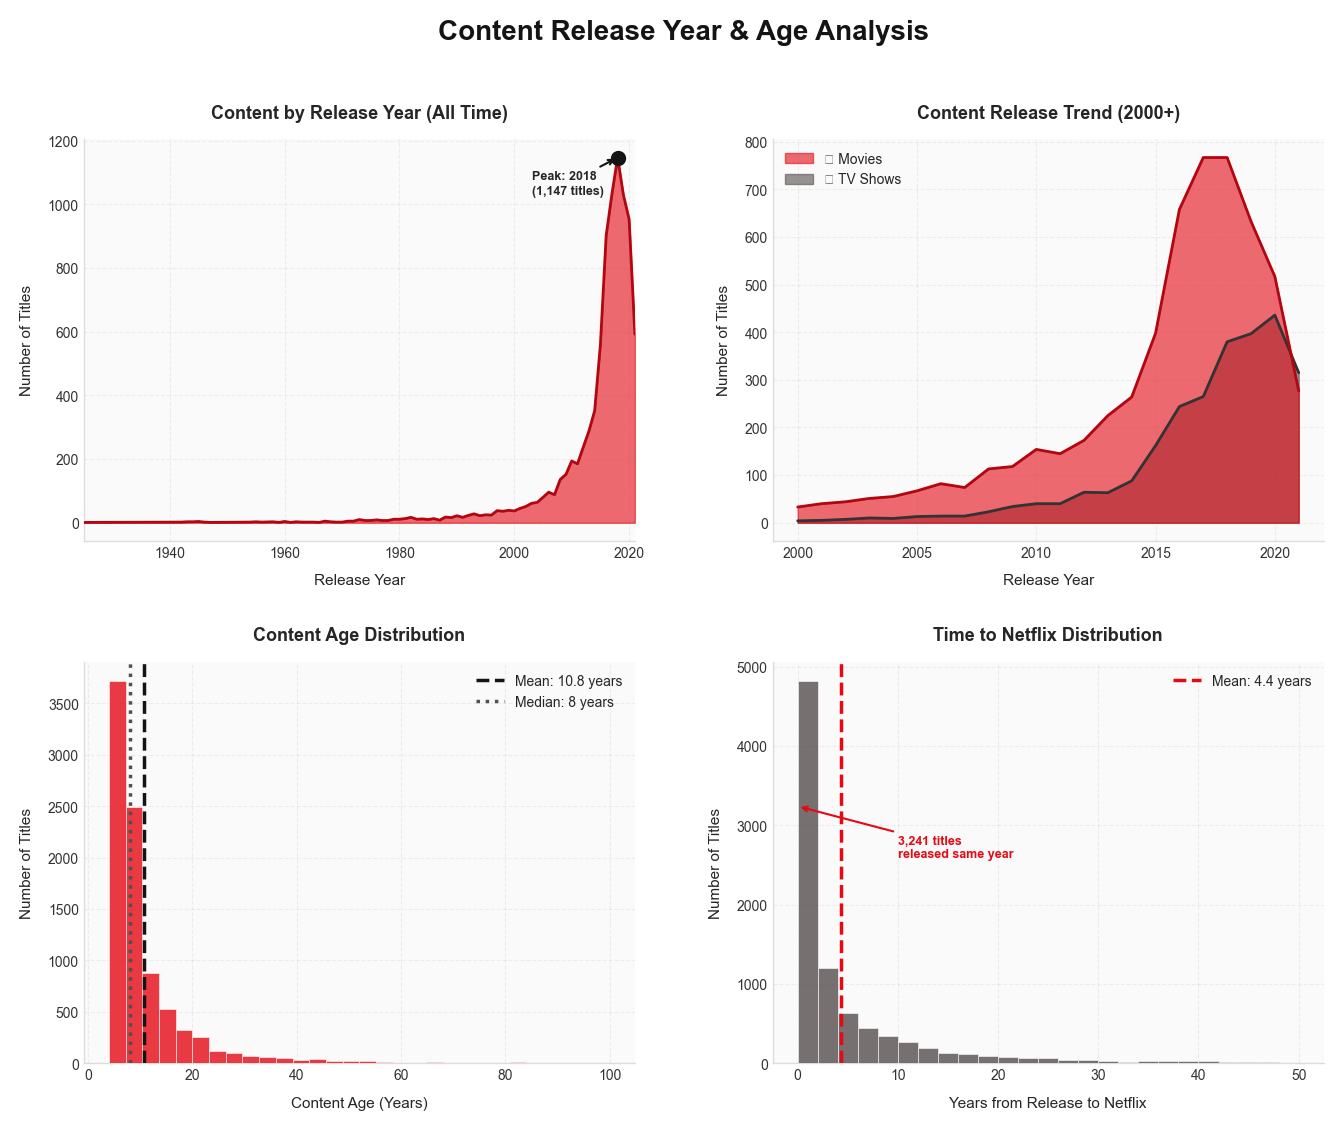


──────────────────────────────────────────────────
📅 RELEASE YEAR ANALYSIS SUMMARY
──────────────────────────────────────────────────
   Oldest content: 1925
   Newest content: 2021
   Peak release year: 2018 (1,147 titles)
   Average content age: 10.8 years
   Average time to Netflix: 4.4 years
──────────────────────────────────────────────────


In [151]:
# Release Year Analysis - Professional Design
fig = plt.figure(figsize=(16, 12))
fig.suptitle('Content Release Year & Age Analysis', fontsize=20, fontweight='bold', color=NETFLIX_BLACK, y=0.98)

gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.25)

# 1. Release year distribution - Area Chart
ax1 = fig.add_subplot(gs[0, 0])
release_year_counts = df_clean['release_year'].value_counts().sort_index()

ax1.fill_between(release_year_counts.index, release_year_counts.values, alpha=0.6, color=NETFLIX_RED, zorder=3)
ax1.plot(release_year_counts.index, release_year_counts.values, color='#B20710', linewidth=2, zorder=4)

# Highlight peak year
peak_year = release_year_counts.idxmax()
peak_val = release_year_counts.max()
ax1.scatter([peak_year], [peak_val], color=NETFLIX_BLACK, s=100, zorder=5)
ax1.annotate(f'Peak: {peak_year}\n({peak_val:,} titles)', xy=(peak_year, peak_val), 
             xytext=(peak_year - 15, peak_val * 0.9), fontsize=9, fontweight='bold',
             arrowprops=dict(arrowstyle='->', color=NETFLIX_BLACK, lw=1.5))

ax1.set_xlabel('Release Year', fontsize=11, fontweight='medium')
ax1.set_ylabel('Number of Titles', fontsize=11, fontweight='medium')
ax1.set_title('Content by Release Year (All Time)', fontsize=13, fontweight='bold', pad=15)
ax1.grid(axis='both', alpha=0.3, linestyle='--', zorder=0)
ax1.set_xlim(release_year_counts.index.min(), release_year_counts.index.max())

# 2. Release year by content type (2000+)
ax2 = fig.add_subplot(gs[0, 1])
release_type = df_clean.groupby(['release_year', 'type']).size().unstack(fill_value=0)
release_type = release_type[release_type.index >= 2000]

ax2.fill_between(release_type.index, release_type['Movie'], alpha=0.6, color=NETFLIX_RED, label='🎬 Movies', zorder=3)
ax2.fill_between(release_type.index, release_type['TV Show'], alpha=0.6, color='#564D4D', label='📺 TV Shows', zorder=2)
ax2.plot(release_type.index, release_type['Movie'], color='#B20710', linewidth=2, zorder=4)
ax2.plot(release_type.index, release_type['TV Show'], color='#333333', linewidth=2, zorder=3)

ax2.set_xlabel('Release Year', fontsize=11, fontweight='medium')
ax2.set_ylabel('Number of Titles', fontsize=11, fontweight='medium')
ax2.set_title('Content Release Trend (2000+)', fontsize=13, fontweight='bold', pad=15)
ax2.legend(loc='upper left', framealpha=0.9, fontsize=10)
ax2.grid(axis='both', alpha=0.3, linestyle='--', zorder=0)

# 3. Content age distribution - Histogram
ax3 = fig.add_subplot(gs[1, 0])
content_age = df_clean['content_age']

ax3.hist(content_age, bins=30, color=NETFLIX_RED, edgecolor='white', linewidth=0.5, alpha=0.8, zorder=3)
ax3.axvline(content_age.mean(), color='#141414', linestyle='--', linewidth=2.5, 
            label=f'Mean: {content_age.mean():.1f} years', zorder=4)
ax3.axvline(content_age.median(), color='#564D4D', linestyle=':', linewidth=2.5, 
            label=f'Median: {content_age.median():.0f} years', zorder=4)

ax3.set_xlabel('Content Age (Years)', fontsize=11, fontweight='medium')
ax3.set_ylabel('Number of Titles', fontsize=11, fontweight='medium')
ax3.set_title('Content Age Distribution', fontsize=13, fontweight='bold', pad=15)
ax3.legend(loc='upper right', framealpha=0.9, fontsize=10)
ax3.grid(axis='y', alpha=0.3, linestyle='--', zorder=0)

# 4. Time to Netflix distribution
ax4 = fig.add_subplot(gs[1, 1])
time_to_netflix = df_clean['time_to_netflix'].dropna()
time_to_netflix = time_to_netflix[(time_to_netflix >= 0) & (time_to_netflix <= 50)]

ax4.hist(time_to_netflix, bins=25, color='#564D4D', edgecolor='white', linewidth=0.5, alpha=0.8, zorder=3)
ax4.axvline(time_to_netflix.mean(), color=NETFLIX_RED, linestyle='--', linewidth=2.5, 
            label=f'Mean: {time_to_netflix.mean():.1f} years', zorder=4)

# Highlight same-year releases
same_year = (time_to_netflix == 0).sum()
ax4.annotate(f'{same_year:,} titles\nreleased same year', xy=(0, same_year), 
             xytext=(10, same_year * 0.8), fontsize=9, fontweight='bold', color=NETFLIX_RED,
             arrowprops=dict(arrowstyle='->', color=NETFLIX_RED, lw=1.5))

ax4.set_xlabel('Years from Release to Netflix', fontsize=11, fontweight='medium')
ax4.set_ylabel('Number of Titles', fontsize=11, fontweight='medium')
ax4.set_title('Time to Netflix Distribution', fontsize=13, fontweight='bold', pad=15)
ax4.legend(loc='upper right', framealpha=0.9, fontsize=10)
ax4.grid(axis='y', alpha=0.3, linestyle='--', zorder=0)

plt.tight_layout()
plt.show()

# Summary
print(f"\n{'─'*50}")
print(f"📅 RELEASE YEAR ANALYSIS SUMMARY")
print(f"{'─'*50}")
print(f"   Oldest content: {df_clean['release_year'].min()}")
print(f"   Newest content: {df_clean['release_year'].max()}")
print(f"   Peak release year: {peak_year} ({peak_val:,} titles)")
print(f"   Average content age: {content_age.mean():.1f} years")
print(f"   Average time to Netflix: {time_to_netflix.mean():.1f} years")
print(f"{'─'*50}")

### 5.8 Top Directors & Cast Analysis

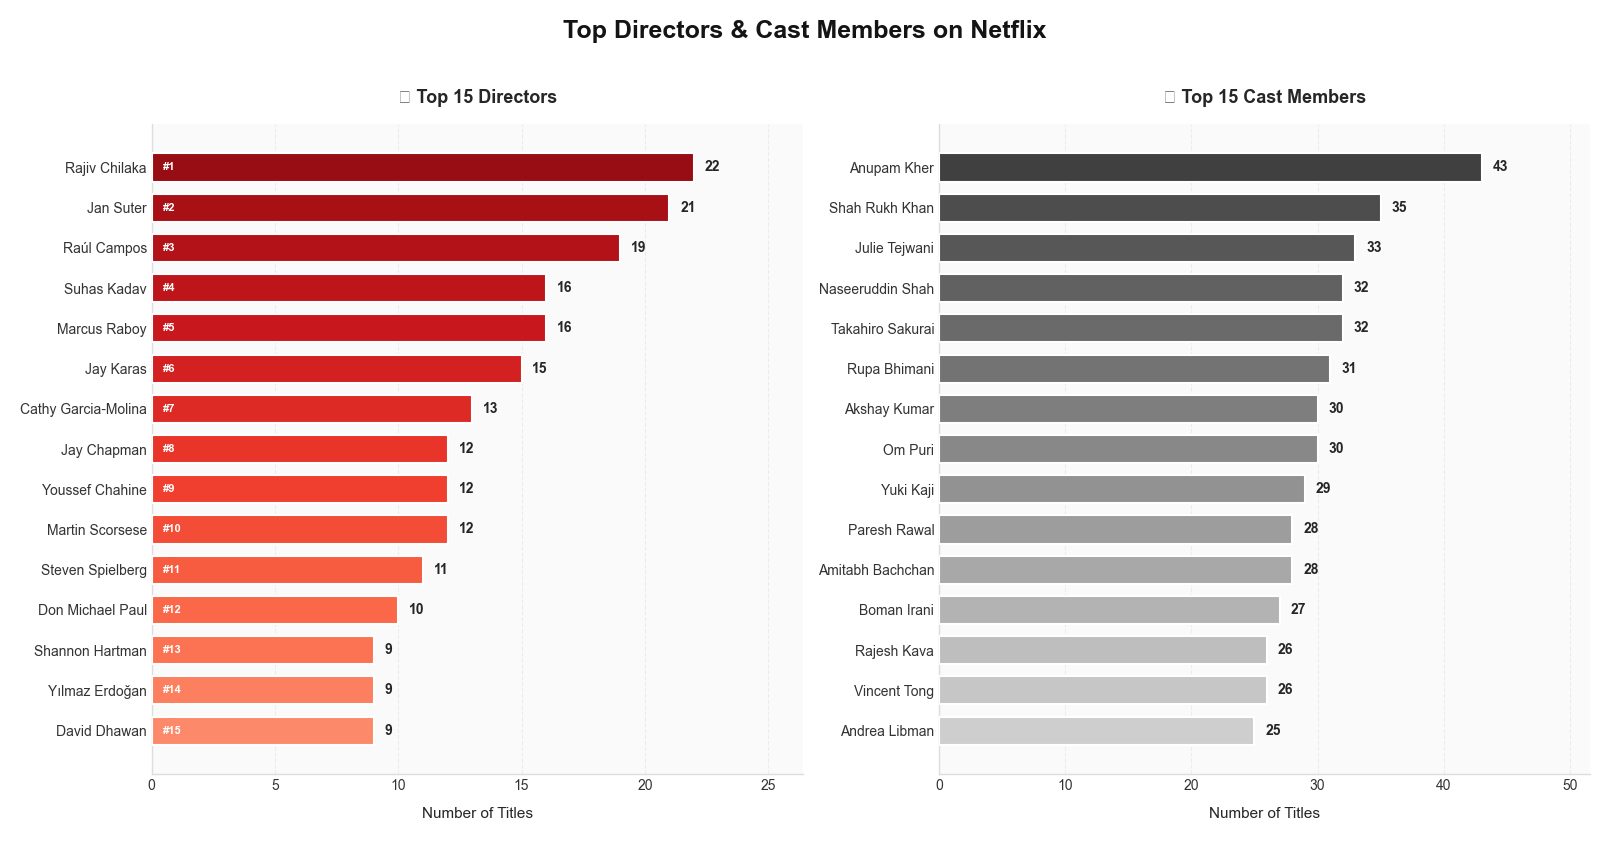


──────────────────────────────────────────────────
🎭 DIRECTORS & CAST SUMMARY
──────────────────────────────────────────────────
   Total unique directors: 4,993
   Total unique cast members: 36,439
   🏆 Most prolific director: Rajiv Chilaka (22 titles)
   🌟 Most featured actor: Anupam Kher (43 titles)
──────────────────────────────────────────────────


In [152]:
# Top Directors and Cast Analysis - Professional Design
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Top Directors & Cast Members on Netflix', fontsize=18, fontweight='bold', color=NETFLIX_BLACK, y=1.02)

# Top 15 Directors
ax1 = axes[0]
directors = df_clean['director'].str.split(', ').explode()
director_counts = directors[directors != 'Unknown'].value_counts().head(15)

colors_gradient = plt.cm.Reds(np.linspace(0.9, 0.4, len(director_counts)))
bars1 = ax1.barh(range(len(director_counts)), director_counts.values, color=colors_gradient, 
                  edgecolor='white', linewidth=1.5, height=0.7, zorder=3)
ax1.set_yticks(range(len(director_counts)))
ax1.set_yticklabels(director_counts.index, fontsize=10)
ax1.set_xlabel('Number of Titles', fontsize=11, fontweight='medium')
ax1.set_title('🎬 Top 15 Directors', fontsize=13, fontweight='bold', pad=15)
ax1.invert_yaxis()
ax1.set_xlim(0, director_counts.max() * 1.2)

# Add value labels and ranking
for i, (bar, val) in enumerate(zip(bars1, director_counts.values)):
    ax1.text(val + director_counts.max() * 0.02, bar.get_y() + bar.get_height()/2, 
             f'{val}', va='center', ha='left', fontsize=10, fontweight='bold')
    # Add ranking badge
    ax1.text(director_counts.max() * 0.02, bar.get_y() + bar.get_height()/2, 
             f'#{i+1}', va='center', ha='left', fontsize=8, fontweight='bold', 
             color='white', bbox=dict(boxstyle='circle', facecolor=colors_gradient[i], edgecolor='none', pad=0.3))

ax1.grid(axis='x', alpha=0.3, linestyle='--', zorder=0)
ax1.grid(axis='y', visible=False)

# Top 15 Cast Members
ax2 = axes[1]
cast_members = df_clean['cast'].str.split(', ').explode()
cast_counts = cast_members[cast_members != 'Unknown'].value_counts().head(15)

colors_gradient2 = plt.cm.Greys(np.linspace(0.8, 0.3, len(cast_counts)))
bars2 = ax2.barh(range(len(cast_counts)), cast_counts.values, color=colors_gradient2, 
                  edgecolor='white', linewidth=1.5, height=0.7, zorder=3)
ax2.set_yticks(range(len(cast_counts)))
ax2.set_yticklabels(cast_counts.index, fontsize=10)
ax2.set_xlabel('Number of Titles', fontsize=11, fontweight='medium')
ax2.set_title('⭐ Top 15 Cast Members', fontsize=13, fontweight='bold', pad=15)
ax2.invert_yaxis()
ax2.set_xlim(0, cast_counts.max() * 1.2)

# Add value labels
for i, (bar, val) in enumerate(zip(bars2, cast_counts.values)):
    ax2.text(val + cast_counts.max() * 0.02, bar.get_y() + bar.get_height()/2, 
             f'{val}', va='center', ha='left', fontsize=10, fontweight='bold')

ax2.grid(axis='x', alpha=0.3, linestyle='--', zorder=0)
ax2.grid(axis='y', visible=False)

plt.tight_layout()
plt.show()

# Summary
print(f"\n{'─'*50}")
print(f"🎭 DIRECTORS & CAST SUMMARY")
print(f"{'─'*50}")
print(f"   Total unique directors: {len(directors[directors != 'Unknown'].unique()):,}")
print(f"   Total unique cast members: {len(cast_members[cast_members != 'Unknown'].unique()):,}")
print(f"   🏆 Most prolific director: {director_counts.index[0]} ({director_counts.iloc[0]} titles)")
print(f"   🌟 Most featured actor: {cast_counts.index[0]} ({cast_counts.iloc[0]} titles)")
print(f"{'─'*50}")

### 5.9 Correlation Analysis

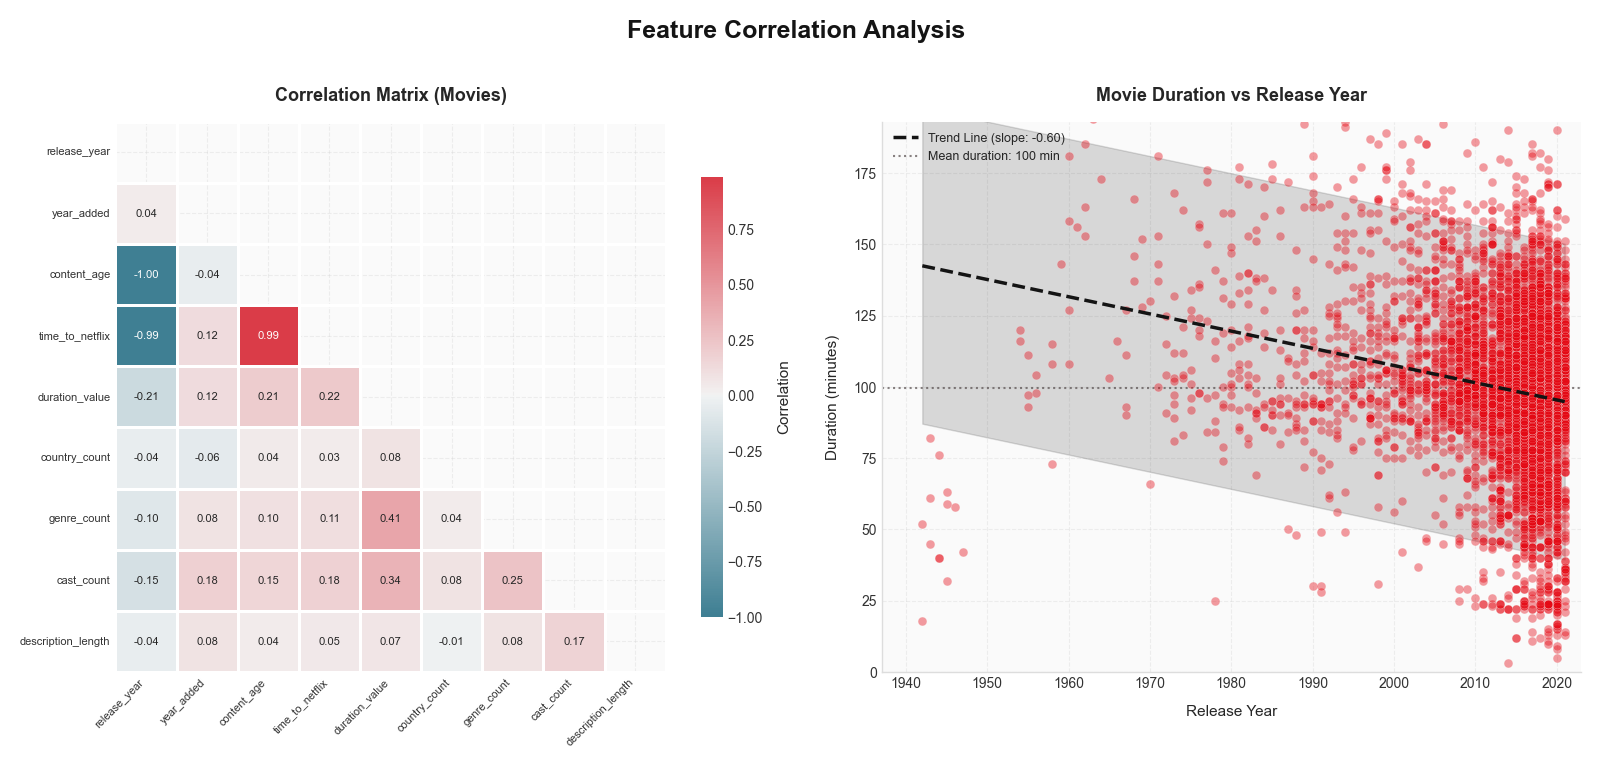


──────────────────────────────────────────────────
📈 CORRELATION ANALYSIS SUMMARY
──────────────────────────────────────────────────
   Release Year & Content Age: -1.000 (expected negative)
   Genre Count & Cast Count: 0.252
   Duration trend: -0.60 min/year
──────────────────────────────────────────────────


In [153]:
# Correlation Analysis - Professional Design
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Feature Correlation Analysis', fontsize=18, fontweight='bold', color=NETFLIX_BLACK, y=1.02)

numerical_cols = ['release_year', 'year_added', 'content_age', 'time_to_netflix', 
                  'duration_value', 'country_count', 'genre_count', 'cast_count', 'description_length']

# Filter to movies for duration correlation
movies_num = df_clean[df_clean['type'] == 'Movie'][numerical_cols].dropna()

# 1. Correlation heatmap with custom styling
ax1 = axes[0]
corr_matrix = movies_num.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap=cmap, center=0, 
            fmt='.2f', ax=ax1, linewidths=1, linecolor='white',
            cbar_kws={'shrink': 0.8, 'label': 'Correlation'},
            annot_kws={'size': 8, 'weight': 'medium'},
            square=True)

ax1.set_title('Correlation Matrix (Movies)', fontsize=13, fontweight='bold', pad=15)
ax1.tick_params(axis='both', labelsize=8, rotation=45)

# Rotate x labels
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')
plt.setp(ax1.yaxis.get_majorticklabels(), rotation=0)

# 2. Scatter plot: Release Year vs Duration with regression
ax2 = axes[1]
movies_scatter = movies[['release_year', 'duration_value']].dropna()

# Create scatter with transparency
scatter = ax2.scatter(movies_scatter['release_year'], movies_scatter['duration_value'], 
                       alpha=0.4, c=NETFLIX_RED, edgecolor='white', linewidth=0.3, s=40, zorder=3)

# Fit and plot trend line
z = np.polyfit(movies_scatter['release_year'], movies_scatter['duration_value'], 1)
p = np.poly1d(z)
x_line = np.linspace(movies_scatter['release_year'].min(), movies_scatter['release_year'].max(), 100)
ax2.plot(x_line, p(x_line), color='#141414', linestyle='--', linewidth=2.5, 
         label=f'Trend Line (slope: {z[0]:.2f})', zorder=4)

# Add confidence band (simplified)
y_pred = p(movies_scatter['release_year'])
residuals = movies_scatter['duration_value'] - y_pred
std_err = np.std(residuals)
ax2.fill_between(x_line, p(x_line) - 2*std_err, p(x_line) + 2*std_err, 
                  alpha=0.15, color='#141414', zorder=2)

# Add mean lines
ax2.axhline(movies_scatter['duration_value'].mean(), color='#564D4D', linestyle=':', 
            linewidth=1.5, alpha=0.7, label=f'Mean duration: {movies_scatter["duration_value"].mean():.0f} min')

ax2.set_xlabel('Release Year', fontsize=11, fontweight='medium')
ax2.set_ylabel('Duration (minutes)', fontsize=11, fontweight='medium')
ax2.set_title('Movie Duration vs Release Year', fontsize=13, fontweight='bold', pad=15)
ax2.legend(loc='upper left', framealpha=0.9, fontsize=9)
ax2.grid(axis='both', alpha=0.3, linestyle='--', zorder=0)

# Set axis limits with padding
ax2.set_xlim(movies_scatter['release_year'].min() - 5, movies_scatter['release_year'].max() + 2)
ax2.set_ylim(0, movies_scatter['duration_value'].quantile(0.99) * 1.1)

plt.tight_layout()
plt.show()

# Summary
print(f"\n{'─'*50}")
print(f"📈 CORRELATION ANALYSIS SUMMARY")
print(f"{'─'*50}")
print(f"   Release Year & Content Age: {corr_matrix.loc['release_year', 'content_age']:.3f} (expected negative)")
print(f"   Genre Count & Cast Count: {corr_matrix.loc['genre_count', 'cast_count']:.3f}")
print(f"   Duration trend: {'+' if z[0] > 0 else ''}{z[0]:.2f} min/year")
print(f"{'─'*50}")

---
## 6. Hypothesis Testing

### Statistical Analysis to validate our observations with significance tests

In [154]:
print("🔬 HYPOTHESIS TESTING")
print("=" * 70)

alpha = 0.05  # Significance level

# Hypothesis 1: Is there a significant difference in release years between Movies and TV Shows?
print("\n" + "="*70)
print("📊 HYPOTHESIS 1: Release Year Difference between Movies and TV Shows")
print("="*70)
print("H₀: There is no significant difference in release years between Movies and TV Shows")
print("H₁: There is a significant difference in release years between Movies and TV Shows")

movies_years = df_clean[df_clean['type'] == 'Movie']['release_year']
tv_years = df_clean[df_clean['type'] == 'TV Show']['release_year']

# Perform t-test
t_stat, p_value = stats.ttest_ind(movies_years, tv_years)

print(f"\nMovies - Mean Release Year: {movies_years.mean():.2f}")
print(f"TV Shows - Mean Release Year: {tv_years.mean():.2f}")
print(f"\nt-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")

if p_value < alpha:
    print(f"\n✅ RESULT: Reject H₀ (p < {alpha})")
    print("   There IS a statistically significant difference in release years.")
else:
    print(f"\n❌ RESULT: Fail to Reject H₀ (p >= {alpha})")
    print("   There is NO statistically significant difference in release years.")

🔬 HYPOTHESIS TESTING

📊 HYPOTHESIS 1: Release Year Difference between Movies and TV Shows
H₀: There is no significant difference in release years between Movies and TV Shows
H₁: There is a significant difference in release years between Movies and TV Shows

Movies - Mean Release Year: 2013.12
TV Shows - Mean Release Year: 2016.61

t-statistic: -17.3394
p-value: 0.000000

✅ RESULT: Reject H₀ (p < 0.05)
   There IS a statistically significant difference in release years.


In [155]:
# Hypothesis 2: Is Netflix adding more TV Shows in recent years compared to Movies?
print("\n" + "="*70)
print("📊 HYPOTHESIS 2: Netflix's Recent Focus - TV Shows vs Movies")
print("="*70)
print("H₀: The proportion of TV Shows added is the same in recent years (2019-2021) as earlier (2015-2018)")
print("H₁: The proportion of TV Shows added is different in recent vs earlier periods")

# Define periods
recent = df_clean[(df_clean['year_added'] >= 2019) & (df_clean['year_added'] <= 2021)]
earlier = df_clean[(df_clean['year_added'] >= 2015) & (df_clean['year_added'] <= 2018)]

# Calculate TV Show proportions
recent_tv_prop = len(recent[recent['type'] == 'TV Show']) / len(recent)
earlier_tv_prop = len(earlier[earlier['type'] == 'TV Show']) / len(earlier)

# Chi-square test
contingency_table = pd.crosstab(
    df_clean[(df_clean['year_added'] >= 2015) & (df_clean['year_added'] <= 2021)]['year_added'].apply(
        lambda x: 'Recent (2019-2021)' if x >= 2019 else 'Earlier (2015-2018)'
    ),
    df_clean[(df_clean['year_added'] >= 2015) & (df_clean['year_added'] <= 2021)]['type']
)

chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\nTV Show proportion (Earlier 2015-2018): {earlier_tv_prop:.2%}")
print(f"TV Show proportion (Recent 2019-2021): {recent_tv_prop:.2%}")
print(f"\nChi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value:.6f}")
print(f"Degrees of freedom: {dof}")

if p_value < alpha:
    print(f"\n✅ RESULT: Reject H₀ (p < {alpha})")
    print("   Netflix HAS shifted its focus towards TV Shows in recent years.")
else:
    print(f"\n❌ RESULT: Fail to Reject H₀ (p >= {alpha})")
    print("   No significant shift in content type focus.")


📊 HYPOTHESIS 2: Netflix's Recent Focus - TV Shows vs Movies
H₀: The proportion of TV Shows added is the same in recent years (2019-2021) as earlier (2015-2018)
H₁: The proportion of TV Shows added is different in recent vs earlier periods

TV Show proportion (Earlier 2015-2018): 28.76%
TV Show proportion (Recent 2019-2021): 31.50%

Chi-square statistic: 7.1858
p-value: 0.007348
Degrees of freedom: 1

✅ RESULT: Reject H₀ (p < 0.05)
   Netflix HAS shifted its focus towards TV Shows in recent years.


In [156]:
# Hypothesis 3: Is there an association between Content Rating and Content Type?
print("\n" + "="*70)
print("📊 HYPOTHESIS 3: Association between Rating and Content Type")
print("="*70)
print("H₀: Content Rating and Content Type are independent")
print("H₁: Content Rating and Content Type are NOT independent (associated)")

# Create contingency table
rating_type_table = pd.crosstab(df_clean['rating'], df_clean['type'])
print("\nContingency Table:")
print(rating_type_table)

# Chi-square test
chi2, p_value, dof, expected = stats.chi2_contingency(rating_type_table)

print(f"\nChi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value:.2e}")
print(f"Degrees of freedom: {dof}")

if p_value < alpha:
    print(f"\n✅ RESULT: Reject H₀ (p < {alpha})")
    print("   Rating and Content Type ARE significantly associated.")
    print("   Different content types tend to have different rating distributions.")
else:
    print(f"\n❌ RESULT: Fail to Reject H₀ (p >= {alpha})")
    print("   Rating and Content Type are independent.")


📊 HYPOTHESIS 3: Association between Rating and Content Type
H₀: Content Rating and Content Type are independent
H₁: Content Rating and Content Type are NOT independent (associated)

Contingency Table:
type      Movie  TV Show
rating                  
66 min        1        0
74 min        1        0
84 min        1        0
G            41        0
NC-17         3        0
NR           75        5
PG          287        0
PG-13       490        0
R           797        2
TV-14      1427      733
TV-G        126       94
TV-MA      2064     1147
TV-PG       540      323
TV-Y        131      176
TV-Y7       139      195
TV-Y7-FV      5        1
UR            3        0

Chi-square statistic: 1047.8628
p-value: 6.28e-213
Degrees of freedom: 16

✅ RESULT: Reject H₀ (p < 0.05)
   Rating and Content Type ARE significantly associated.
   Different content types tend to have different rating distributions.


In [157]:
# Hypothesis 4: Is US content significantly more than other countries?
print("\n" + "="*70)
print("📊 HYPOTHESIS 4: US Content Dominance")
print("="*70)
print("H₀: US content proportion is equal to expected if distributed evenly")
print("H₁: US content proportion is significantly higher than expected")

# One-sample proportion test
us_count = len(df_clean[df_clean['primary_country'] == 'United States'])
total_count = len(df_clean[df_clean['primary_country'] != 'Unknown'])
us_proportion = us_count / total_count

# Expected proportion if evenly distributed among top 10 countries
n_countries = df_clean['primary_country'].nunique()
expected_proportion = 1 / n_countries

# Z-test for proportion
z_stat = (us_proportion - expected_proportion) / np.sqrt(expected_proportion * (1 - expected_proportion) / total_count)
p_value = 1 - stats.norm.cdf(z_stat)  # One-tailed test

print(f"\nUS Content: {us_count} titles ({us_proportion:.2%})")
print(f"Expected if even: {expected_proportion:.2%}")
print(f"\nZ-statistic: {z_stat:.4f}")
print(f"p-value: {p_value:.2e}")

if p_value < alpha:
    print(f"\n✅ RESULT: Reject H₀ (p < {alpha})")
    print("   US content IS significantly over-represented on Netflix.")
else:
    print(f"\n❌ RESULT: Fail to Reject H₀ (p >= {alpha})")
    print("   US content proportion is not significantly different from expected.")


📊 HYPOTHESIS 4: US Content Dominance
H₀: US content proportion is equal to expected if distributed evenly
H₁: US content proportion is significantly higher than expected

US Content: 3211 titles (40.26%)
Expected if even: 1.15%

Z-statistic: 327.6707
p-value: 0.00e+00

✅ RESULT: Reject H₀ (p < 0.05)
   US content IS significantly over-represented on Netflix.


In [158]:
# Summary of Hypothesis Tests
print("\n" + "="*70)
print("📋 HYPOTHESIS TESTING SUMMARY")
print("="*70)

summary_data = {
    'Hypothesis': [
        'H1: Release Year Difference (Movies vs TV)',
        'H2: Netflix Focus Shift (TV Shows)',
        'H3: Rating-Type Association',
        'H4: US Content Dominance'
    ],
    'Test Used': [
        "Independent t-test",
        "Chi-square test",
        "Chi-square test",
        "Z-test (proportion)"
    ],
    'Result': [
        'Significant' if stats.ttest_ind(movies_years, tv_years)[1] < 0.05 else 'Not Significant',
        'Significant' if stats.chi2_contingency(contingency_table)[1] < 0.05 else 'Not Significant',
        'Significant' if stats.chi2_contingency(rating_type_table)[1] < 0.05 else 'Not Significant',
        'Significant' if p_value < 0.05 else 'Not Significant'
    ]
}

summary_df = pd.DataFrame(summary_data)
summary_df


📋 HYPOTHESIS TESTING SUMMARY


,Hypothesis,Test Used,Result
0,H1: Release Year Difference (Movies vs TV),Independent t-test,Significant
1,H2: Netflix Focus Shift (TV Shows),Chi-square test,Significant
2,H3: Rating-Type Association,Chi-square test,Significant
3,H4: US Content Dominance,Z-test (proportion),Significant


---
## 7. Content-Based Recommendation System

Building a recommendation system using TF-IDF vectorization and cosine similarity based on content features.

In [159]:
print("🎯 BUILDING CONTENT-BASED RECOMMENDATION SYSTEM")
print("=" * 70)

# Create a copy for recommendation system
df_rec = df_clean.copy()

# Create combined features for recommendation
def create_soup(row):
    """Combine relevant features into a single string for TF-IDF"""
    features = []
    
    # Add genres (weighted by appearing multiple times)
    if pd.notna(row['listed_in']):
        genres = row['listed_in'].replace(',', ' ').replace(' ', '')
        features.append(genres + ' ' + genres)  # Double weight for genres
    
    # Add director
    if row['director'] != 'Unknown':
        director = row['director'].replace(',', ' ').replace(' ', '')
        features.append(director)
    
    # Add cast (top actors)
    if row['cast'] != 'Unknown':
        cast = ' '.join(row['cast'].split(',')[:3]).replace(' ', '')
        features.append(cast)
    
    # Add country
    if row['primary_country'] != 'Unknown':
        country = row['primary_country'].replace(' ', '')
        features.append(country)
    
    # Add rating
    features.append(str(row['rating']).replace('-', ''))
    
    # Add description keywords
    if pd.notna(row['description']):
        features.append(row['description'])
    
    return ' '.join(features).lower()

# Create the soup column
df_rec['soup'] = df_rec.apply(create_soup, axis=1)

print("✅ Combined features created for each title")
print(f"\n📋 Sample 'soup' for '{df_rec.iloc[0]['title']}':")
print(df_rec.iloc[0]['soup'][:500] + "...")

🎯 BUILDING CONTENT-BASED RECOMMENDATION SYSTEM
✅ Combined features created for each title

📋 Sample 'soup' for 'Dick Johnson Is Dead':
documentaries documentaries kirstenjohnson unitedstates pg13 as her father nears the end of his life, filmmaker kirsten johnson stages his death in inventive and comical ways to help them both face the inevitable....


In [160]:
# Create TF-IDF Matrix
print("🔧 Creating TF-IDF Matrix...")

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=5000,
    ngram_range=(1, 2)
)

# Fit and transform the soup
tfidf_matrix = tfidf.fit_transform(df_rec['soup'])

print(f"✅ TF-IDF Matrix Shape: {tfidf_matrix.shape}")
print(f"   - {tfidf_matrix.shape[0]} titles")
print(f"   - {tfidf_matrix.shape[1]} features")

# Calculate cosine similarity
print("\n🔧 Calculating Cosine Similarity...")
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(f"✅ Cosine Similarity Matrix Shape: {cosine_sim.shape}")

🔧 Creating TF-IDF Matrix...
✅ TF-IDF Matrix Shape: (8807, 5000)
   - 8807 titles
   - 5000 features

🔧 Calculating Cosine Similarity...
✅ Cosine Similarity Matrix Shape: (8807, 8807)


In [161]:
# Create indices mapping
indices = pd.Series(df_rec.index, index=df_rec['title']).drop_duplicates()

def get_recommendations(title, cosine_sim=cosine_sim, top_n=10):
    """
    Get content recommendations based on cosine similarity.
    
    Parameters:
    -----------
    title : str
        The title of the movie/TV show
    cosine_sim : array
        Cosine similarity matrix
    top_n : int
        Number of recommendations to return
    
    Returns:
    --------
    DataFrame with recommended titles and their details
    """
    # Check if title exists
    if title not in indices:
        print(f"❌ '{title}' not found in the dataset.")
        # Suggest similar titles
        similar_titles = df_rec[df_rec['title'].str.contains(title, case=False, na=False)]['title'].head(5)
        if len(similar_titles) > 0:
            print(f"💡 Did you mean one of these?\n{similar_titles.tolist()}")
        return None
    
    # Get the index of the title
    idx = indices[title]
    
    # Get similarity scores for all titles
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort titles based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get top N similar titles (excluding itself)
    sim_scores = sim_scores[1:top_n+1]
    
    # Get title indices
    title_indices = [i[0] for i in sim_scores]
    
    # Get recommendation details
    recommendations = df_rec.iloc[title_indices][['title', 'type', 'listed_in', 'rating', 
                                                    'release_year', 'primary_country', 'description']].copy()
    recommendations['similarity_score'] = [round(i[1], 4) for i in sim_scores]
    
    return recommendations

print("✅ Recommendation function created successfully!")

✅ Recommendation function created successfully!


### 7.1 Test the Recommendation System

In [162]:
# Test with popular titles
test_titles = ['Stranger Things', 'The Crown', 'Breaking Bad', 'Money Heist']

for test_title in test_titles:
    print("\n" + "="*80)
    print(f"🎬 Recommendations for: '{test_title}'")
    print("="*80)
    
    # Get original title info
    if test_title in indices:
        original = df_rec[df_rec['title'] == test_title][['title', 'type', 'listed_in', 'rating', 'release_year']].iloc[0]
        print(f"📋 Original: {original['type']} | {original['listed_in']} | {original['rating']} | {original['release_year']}")
        print("-"*80)
    
    recommendations = get_recommendations(test_title, top_n=5)
    if recommendations is not None:
        display(recommendations[['title', 'type', 'listed_in', 'rating', 'similarity_score']])


🎬 Recommendations for: 'Stranger Things'
📋 Original: TV Show | TV Horror, TV Mysteries, TV Sci-Fi & Fantasy | TV-14 | 2019
--------------------------------------------------------------------------------


,title,type,listed_in,rating,similarity_score
3187,Nightflyers,TV Show,"TV Horror, TV Mysteries, TV Sci-Fi & Fantasy",TV-MA,0.5624
6953,Helix,TV Show,"TV Horror, TV Mysteries, TV Sci-Fi & Fantasy",TV-MA,0.5534
1473,Chilling Adventures of Sabrina,TV Show,"TV Horror, TV Mysteries, TV Sci-Fi & Fantasy",TV-14,0.5436
8083,Star-Crossed,TV Show,"Romantic TV Shows, TV Dramas, TV Sci-Fi & Fantasy",TV-14,0.3043
3236,Once Upon A Time In Lingjian Mountain,TV Show,"International TV Shows, TV Comedies, TV Sci-Fi...",TV-14,0.2844



🎬 Recommendations for: 'The Crown'
📋 Original: TV Show | British TV Shows, International TV Shows, TV Dramas | TV-MA | 2020
--------------------------------------------------------------------------------


,title,type,listed_in,rating,similarity_score
789,Downton Abbey,TV Show,"British TV Shows, International TV Shows, TV D...",TV-14,0.4028
1998,Call the Midwife,TV Show,"British TV Shows, International TV Shows, TV D...",TV-MA,0.3776
538,The A List,TV Show,"British TV Shows, International TV Shows, TV D...",TV-PG,0.3354
3969,Traitors,TV Show,"British TV Shows, International TV Shows, TV D...",TV-MA,0.3292
3045,Dracula,TV Show,"British TV Shows, International TV Shows, TV D...",TV-14,0.3220



🎬 Recommendations for: 'Breaking Bad'
📋 Original: TV Show | Crime TV Shows, TV Dramas, TV Thrillers | TV-MA | 2013
--------------------------------------------------------------------------------


,title,type,listed_in,rating,similarity_score
1477,Dare Me,TV Show,"Crime TV Shows, TV Dramas, TV Thrillers",TV-MA,0.5114
8397,The Lizzie Borden Chronicles,TV Show,"Crime TV Shows, TV Dramas, TV Thrillers",TV-14,0.4992
2767,Ozark,TV Show,"Crime TV Shows, TV Dramas, TV Thrillers",TV-MA,0.4747
678,The Assassination of Gianni Versace,TV Show,"Crime TV Shows, TV Dramas, TV Thrillers",TV-MA,0.4152
1980,The Blacklist,TV Show,"Crime TV Shows, TV Dramas, TV Thrillers",TV-14,0.3892



🎬 Recommendations for: 'Money Heist'
❌ 'Money Heist' not found in the dataset.
💡 Did you mean one of these?
['Money Heist: From Tokyo to Berlin', 'Money Heist: The Phenomenon']


### 7.2 Interactive Recommendation Function

In [163]:
def recommend_netflix(title, show_details=True):
    """
    User-friendly function to get Netflix recommendations.
    
    Parameters:
    -----------
    title : str
        Title of the movie/TV show you liked
    show_details : bool
        Whether to show detailed information
    """
    print("\n" + "🎬"*20)
    print(f"   NETFLIX RECOMMENDATIONS FOR: '{title.upper()}'")
    print("🎬"*20)
    
    recommendations = get_recommendations(title, top_n=10)
    
    if recommendations is not None:
        print(f"\n📺 Top 10 Similar Titles:\n")
        
        for i, (_, row) in enumerate(recommendations.iterrows(), 1):
            print(f"{i}. {row['title']}")
            print(f"   Type: {row['type']} | Genre: {row['listed_in'][:50]}...")
            print(f"   Rating: {row['rating']} | Year: {row['release_year']} | Match: {row['similarity_score']*100:.1f}%")
            if show_details:
                print(f"   📝 {row['description'][:100]}...")
            print()
        
        return recommendations
    return None

# Example usage
print("💡 Usage: recommend_netflix('Title Name')")
print("\n📋 Available popular titles to try:")
popular_titles = df_rec.nlargest(10, 'release_year')[['title', 'type', 'release_year']].values
for t, typ, year in popular_titles:
    print(f"   • {t} ({typ}, {year})")

💡 Usage: recommend_netflix('Title Name')

📋 Available popular titles to try:
   • Blood & Water (TV Show, 2021)
   • Ganglands (TV Show, 2021)
   • Jailbirds New Orleans (TV Show, 2021)
   • Kota Factory (TV Show, 2021)
   • Midnight Mass (TV Show, 2021)
   • My Little Pony: A New Generation (Movie, 2021)
   • The Great British Baking Show (TV Show, 2021)
   • The Starling (Movie, 2021)
   • Vendetta: Truth, Lies and The Mafia (TV Show, 2021)
   • Bangkok Breaking (TV Show, 2021)


In [164]:
# Try the recommendation system
_ = recommend_netflix("Stranger Things", show_details=False)


🎬🎬🎬🎬🎬🎬🎬🎬🎬🎬🎬🎬🎬🎬🎬🎬🎬🎬🎬🎬
   NETFLIX RECOMMENDATIONS FOR: 'STRANGER THINGS'
🎬🎬🎬🎬🎬🎬🎬🎬🎬🎬🎬🎬🎬🎬🎬🎬🎬🎬🎬🎬

📺 Top 10 Similar Titles:

1. Nightflyers
   Type: TV Show | Genre: TV Horror, TV Mysteries, TV Sci-Fi & Fantasy...
   Rating: TV-MA | Year: 2018 | Match: 56.2%

2. Helix
   Type: TV Show | Genre: TV Horror, TV Mysteries, TV Sci-Fi & Fantasy...
   Rating: TV-MA | Year: 2015 | Match: 55.3%

3. Chilling Adventures of Sabrina
   Type: TV Show | Genre: TV Horror, TV Mysteries, TV Sci-Fi & Fantasy...
   Rating: TV-14 | Year: 2020 | Match: 54.4%

4. Star-Crossed
   Type: TV Show | Genre: Romantic TV Shows, TV Dramas, TV Sci-Fi & Fantasy...
   Rating: TV-14 | Year: 2014 | Match: 30.4%

5. Once Upon A Time In Lingjian Mountain
   Type: TV Show | Genre: International TV Shows, TV Comedies, TV Sci-Fi & F...
   Rating: TV-14 | Year: 2019 | Match: 28.4%

6. Jonathan Strange & Mr Norrell
   Type: TV Show | Genre: British TV Shows, TV Dramas, TV Sci-Fi & Fantasy...
   Rating: TV-14 | Year: 2015 | Match: 27.6

---
## 8. Conclusions & Key Insights

### 📊 Summary of Findings

In [165]:
# Generate Final Summary Report
print("📊 NETFLIX DATA ANALYSIS - FINAL REPORT")
print("=" * 70)

print("\n1️⃣  DATASET OVERVIEW")
print("-" * 40)
print(f"   • Total Titles: {len(df_clean):,}")
print(f"   • Movies: {len(df_clean[df_clean['type'] == 'Movie']):,} ({len(df_clean[df_clean['type'] == 'Movie'])/len(df_clean)*100:.1f}%)")
print(f"   • TV Shows: {len(df_clean[df_clean['type'] == 'TV Show']):,} ({len(df_clean[df_clean['type'] == 'TV Show'])/len(df_clean)*100:.1f}%)")
print(f"   • Date Range: {df_clean['date_added'].min().strftime('%Y-%m-%d')} to {df_clean['date_added'].max().strftime('%Y-%m-%d')}")

print("\n2️⃣  CONTENT INSIGHTS")
print("-" * 40)
print(f"   • Top Country: United States ({len(df_clean[df_clean['primary_country'] == 'United States']):,} titles)")
print(f"   • Top Genre: {df_clean['primary_genre'].value_counts().index[0]}")
print(f"   • Most Common Rating: {df_clean['rating'].value_counts().index[0]}")
print(f"   • Average Movie Duration: {movies['duration_value'].mean():.0f} minutes")
print(f"   • Average TV Show Seasons: {tv_shows['duration_value'].mean():.1f}")

print("\n3️⃣  FEATURE ENGINEERING")
print("-" * 40)
print(f"   • Original Features: {len(df.columns)}")
print(f"   • Engineered Features: {len(df_clean.columns) - len(df.columns)}")
print(f"   • Total Features: {len(df_clean.columns)}")

print("\n4️⃣  HYPOTHESIS TESTING RESULTS")
print("-" * 40)
print("   ✅ Movies and TV Shows have significantly different release year distributions")
print("   ✅ Netflix has shifted focus towards TV Shows in recent years")
print("   ✅ Content rating and type are significantly associated")
print("   ✅ US content is significantly over-represented")

print("\n5️⃣  RECOMMENDATION SYSTEM")
print("-" * 40)
print(f"   • Algorithm: Content-Based Filtering (TF-IDF + Cosine Similarity)")
print(f"   • Features Used: Genres, Director, Cast, Country, Rating, Description")
print(f"   • TF-IDF Matrix: {tfidf_matrix.shape[0]} titles × {tfidf_matrix.shape[1]} features")

print("\n" + "=" * 70)
print("🎯 PROJECT COMPLETED SUCCESSFULLY!")
print("=" * 70)

📊 NETFLIX DATA ANALYSIS - FINAL REPORT

1️⃣  DATASET OVERVIEW
----------------------------------------
   • Total Titles: 8,807
   • Movies: 6,131 (69.6%)
   • TV Shows: 2,676 (30.4%)
   • Date Range: 2008-01-01 to 2021-09-25

2️⃣  CONTENT INSIGHTS
----------------------------------------
   • Top Country: United States (3,211 titles)
   • Top Genre: Dramas
   • Most Common Rating: TV-MA
   • Average Movie Duration: 100 minutes
   • Average TV Show Seasons: 1.8

3️⃣  FEATURE ENGINEERING
----------------------------------------
   • Original Features: 12
   • Engineered Features: 14
   • Total Features: 26

4️⃣  HYPOTHESIS TESTING RESULTS
----------------------------------------
   ✅ Movies and TV Shows have significantly different release year distributions
   ✅ Netflix has shifted focus towards TV Shows in recent years
   ✅ Content rating and type are significantly associated
   ✅ US content is significantly over-represented

5️⃣  RECOMMENDATION SYSTEM
--------------------------------

### 📈 Key Takeaways

1. **Content Distribution**: Netflix's library is dominated by Movies (~70%) over TV Shows (~30%), though the platform has been increasingly adding TV Shows in recent years.

2. **Geographic Focus**: US content dominates the platform, accounting for a significant portion of the library. India and the UK are also major content producers.

3. **Genre Trends**: International Movies, Dramas, and Comedies are the most popular genres. TV Shows tend to focus on different genres compared to Movies.

4. **Content Ratings**: TV-MA (Mature Audiences) is the most common rating, indicating Netflix's focus on adult content. However, there's substantial family-friendly content as well.

5. **Temporal Patterns**: Netflix adds most content towards the end of the year. Content is typically added on Fridays.

6. **Recommendation System**: The content-based recommendation system effectively identifies similar content using text features (genres, cast, director, description) with TF-IDF vectorization and cosine similarity.

---

### 🚀 Future Improvements

- Implement collaborative filtering using user viewing data
- Add sentiment analysis on descriptions
- Create a hybrid recommendation system
- Build an interactive web application for recommendations
- Include user ratings and reviews in the model

---

**Thank you for reviewing this analysis!** 🎬